In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE, RandomOverSampler
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Transformed_data_v1.0_Final.csv")
df

Site  Customer ID  ModelChoice_Default_Flag  \
0       AA        59878                         0   
1       AA        64594                         0   
2       AA        60782                         0   
3       AA        64172                         1   
4       AA        62012                         0   
...    ...          ...                       ...   
14206   VV        55980                         0   
14207   VV        62273                         0   
14208   VV        63954                         0   
14209   VV        65190                         0   
14210   VV        66843                         0   

       Creditlens_FIN_ACID_TEST_RATIO  \
0                        3.698561e-01   
1                        4.509198e-01   
2                        1.117330e+00   
3                        9.851680e-01   
4                        8.103052e-01   
...                               ...   
14206                    1.000000e+11   
14207                    1.000000e+11   
14208                    1.000000e+11   
14209                    1.000000e+11   
14210                    1.000000e+11   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
0                                        2.306480e+01   
1                                        9.277703e+00   
2                                        1.782799e+01   
3                                        1.733061e+01   
4                                        1.726112e+01   
...                                               ...   
14206                                    1.000000e+11   
14207                                    1.000000e+11   
14208                                    1.000000e+11   
14209                                    1.000000e+11   
14210                                    1.000000e+11   

       Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
0                                         38.329372   
1                                        154.488358   
2                                         19.103769   
3                                         19.503665   
4                                         17.078385   
...                                             ...   
14206                                           NaN   
14207                                           NaN   
14208                                           NaN   
14209                                           NaN   
14210                                           NaN   

       Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
0                             7.395092e-01                     3.054183e+01   
1                             2.999206e+01                     1.301444e+01   
2                             1.113960e+01                     2.136470e+01   
3                             4.171558e+00                     2.102938e+01   
4                             6.113280e+00                     2.115869e+01   
...                                    ...                              ...   
14206                         1.000000e+11                     1.000000e+11   
14207                         1.000000e+11                     1.000000e+11   
14208                         1.000000e+11                     1.000000e+11   
14209                         1.000000e+11                     1.000000e+11   
14210                         1.000000e+11                     1.000000e+11   

       Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
0                                 2.108217e+00   
1                                 1.000000e+11   
2                                 8.253444e-01   
3                                 1.217533e+00   
4                                 1.477698e+00   
...                                        ...   
14206                             1.000000e+11   
14207                             1.000000e+11   
14208                             1.000000e+11   
14209                             1.000000e+11   
14210                          

In [3]:
original_var = df.columns.tolist()
original_var

['Site',
 'Customer ID',
 'ModelChoice_Default_Flag',
 'Creditlens_FIN_ACID_TEST_RATIO',
 'Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT',
 'Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT',
 'Creditlens_FIN_CIV_CASH_EQUIVALENTS',
 'Creditlens_FIN_CIV_GROSS_PROFIT',
 'Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE',
 'Creditlens_FIN_CIV_OPERATING_EXPENSE',
 'Creditlens_FIN_CIV_OPERATING_PROFIT',
 'Creditlens_FIN_CIV_PROFIT_BEFORE_TAXES',
 'Creditlens_FIN_CURRENT',
 'Creditlens_FIN_GROSS_PROFIT_MARGIN',
 'Creditlens_FIN_OE_TO_TURNOVER',
 'Creditlens_FIN_OPERATING_LEVERAGE',
 'Creditlens_FIN_OPERATING_PROFIT_MARGIN',
 'Creditlens_FIN_PP_NET_MARGIN',
 'Creditlens_FIN_QUICK',
 'Creditlens_FIN_TURNOVER_TO_WORKING_CAPITAL',
 'Creditlens_FIN_CIV_NET_WORTH',
 'Creditlens_FIN_DEBT_TO_TNW',
 'Internal_Behavior_Flag',
 'max_mth_num_1_int_delq',
 'max_mth_num_2_int_delq',
 'max_mth_num_3_int_delq',
 'max_mth_num_4_int_delq',
 'max_mth_num_5_int_delq',
 'max_mth_num_6_int_delq',
 'total_1_int_delq',
 'total

In [4]:
baseline_var = original_var.copy()
baseline_var.remove('Customer ID')
baseline_var.remove('ModelChoice_Default_Flag')
baseline_var

['Site',
 'Creditlens_FIN_ACID_TEST_RATIO',
 'Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT',
 'Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT',
 'Creditlens_FIN_CIV_CASH_EQUIVALENTS',
 'Creditlens_FIN_CIV_GROSS_PROFIT',
 'Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE',
 'Creditlens_FIN_CIV_OPERATING_EXPENSE',
 'Creditlens_FIN_CIV_OPERATING_PROFIT',
 'Creditlens_FIN_CIV_PROFIT_BEFORE_TAXES',
 'Creditlens_FIN_CURRENT',
 'Creditlens_FIN_GROSS_PROFIT_MARGIN',
 'Creditlens_FIN_OE_TO_TURNOVER',
 'Creditlens_FIN_OPERATING_LEVERAGE',
 'Creditlens_FIN_OPERATING_PROFIT_MARGIN',
 'Creditlens_FIN_PP_NET_MARGIN',
 'Creditlens_FIN_QUICK',
 'Creditlens_FIN_TURNOVER_TO_WORKING_CAPITAL',
 'Creditlens_FIN_CIV_NET_WORTH',
 'Creditlens_FIN_DEBT_TO_TNW',
 'Internal_Behavior_Flag',
 'max_mth_num_1_int_delq',
 'max_mth_num_2_int_delq',
 'max_mth_num_3_int_delq',
 'max_mth_num_4_int_delq',
 'max_mth_num_5_int_delq',
 'max_mth_num_6_int_delq',
 'total_1_int_delq',
 'total_2_int_delq',
 'total_3_int_delq',
 'total_4_

# Data Precessing

## Segment Dividing

### Dealing with 'Age_of_Company_in_Month'

In [5]:
# 将月份转换为年份
df['Age_of_Company_in_Years'] = df['Age_of_Company_in_Month'] / 12

# 创建年份分段
bins = [0, 2, 5, 10, 20, 50, np.inf]  # 定义分段边界
labels = ['0-2 years', '2-5 years', '6-10 years', '10-20 years', '20-50 years', 'More than 50 years']  # 定义每个分段的标签
df['Age_Category'] = pd.cut(df['Age_of_Company_in_Years'], bins=bins, labels=labels, right=False)

# 检查结果
print(df[['Age_of_Company_in_Month', 'Age_of_Company_in_Years', 'Age_Category']].head())

# 将'Age_Category'列中的缺失值先填充为'Missing'
# 添加新类别 'Missing'
df['Age_Category'] = df['Age_Category'].cat.add_categories(['Missing'])
df['Age_Category'].fillna('Missing', inplace=True)

# 删除原始Age of Company列
# del df['Age_of_Company_in_Month']
# del df['Age_of_Company_in_Years']

   Age_of_Company_in_Month  Age_of_Company_in_Years        Age_Category
0                    173.0                14.416667         10-20 years
1                    185.0                15.416667         10-20 years
2                    996.0                83.000000  More than 50 years
3                   1009.0                84.083333  More than 50 years
4                   1023.0                85.250000  More than 50 years


### Dividing Segment

In [6]:
# Mark related columns: more subtle
columns_to_segment_by = ['Site', 'Age_Category', 'Industry_Manufacturing_Flag', 'Industry_Wholesale_Trade_Flag', 'Industry_Services_Flag']

# Mark related columns: more general
columns_to_segment_by_2 = ['Site', 'Industry_Manufacturing_Flag', 'Industry_Wholesale_Trade_Flag', 'Industry_Services_Flag']
# 创建一个新的列'Segment'，它是你指定的所有列的组合
df['Segment'] = df[columns_to_segment_by].apply(lambda x: '_'.join(x.astype(str)), axis=1)
df['Segment2'] = df[columns_to_segment_by_2].apply(lambda x: '_'.join(x.astype(str)), axis=1)
# 查看结果
print(df[['Segment']])

                           Segment
0             AA_10-20 years_1_0_0
1             AA_10-20 years_0_1_0
2      AA_More than 50 years_1_0_0
3      AA_More than 50 years_1_0_0
4      AA_More than 50 years_1_0_0
...                            ...
14206         VV_20-50 years_0_1_0
14207         VV_10-20 years_0_1_0
14208         VV_10-20 years_0_1_0
14209         VV_20-50 years_0_1_0
14210         VV_10-20 years_0_1_0

[14211 rows x 1 columns]


In [7]:
# 分组并计算每个Segment的统计数据，比如计数
segment_analysis = df.groupby('Segment').size()

# 输出每个segment的大小
print(segment_analysis)

Segment
AA_0-2 years_0_0_0               4
AA_0-2 years_0_0_1               4
AA_0-2 years_0_1_0               7
AA_0-2 years_1_0_0              16
AA_10-20 years_0_0_0           199
                              ... 
VV_Missing_1_0_0               122
VV_More than 50 years_0_0_0     37
VV_More than 50 years_0_0_1     34
VV_More than 50 years_0_1_0     25
VV_More than 50 years_1_0_0     23
Length: 82, dtype: int64


In [8]:
# 分组并计算每个Segment的统计数据，比如计数
segment2_analysis = df.groupby('Segment2').size()

# 输出每个segment的大小
print(segment2_analysis)

Segment2
AA_0_0_0     550
AA_0_0_1    1122
AA_0_1_0    1089
AA_1_0_0    2034
BB_0_0_0    1170
BB_0_0_1     550
BB_0_1_0    1503
BB_1_0_0    1652
VV_0_0_0    1110
VV_0_0_1    1514
VV_0_1_0    1392
VV_1_0_0     525
dtype: int64


In [9]:
df.head()

Site  Customer ID  ModelChoice_Default_Flag  Creditlens_FIN_ACID_TEST_RATIO  \
0   AA        59878                         0                        0.369856   
1   AA        64594                         0                        0.450920   
2   AA        60782                         0                        1.117330   
3   AA        64172                         1                        0.985168   
4   AA        62012                         0                        0.810305   

   Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
0                                       23.064805   
1                                        9.277703   
2                                       17.827993   
3                                       17.330613   
4                                       17.261122   

   Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
0                                     38.329372   
1                                    154.488358   
2                                     19.103769   
3                                     19.503665   
4                                     17.078385   

   Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
0                             0.739509                        30.541829   
1                            29.992057                        13.014443   
2                            11.139603                        21.364696   
3                             4.171558                        21.029383   
4                             6.113280                        21.158687   

   Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
0                             2.108217e+00   
1                             1.000000e+11   
2                             8.253444e-01   
3                             1.217533e+00   
4                             1.477698e+00   

   Creditlens_FIN_CIV_OPERATING_EXPENSE  ...  max_mth_num_2_delq_L1  \
0                             33.008193  ...                    NaN   
1                            151.590549  ...                    NaN   
2                             19.953749  ...                    NaN   
3                             20.212672  ...                    NaN   
4                             18.103598  ...                    NaN   

   max_mth_num_3_delq_L1  max_mth_num_4_delq_L1  max_mth_num_5_delq_L1  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

   max_mth_num_6_delq_L1  recovery_delq_L1  Age_of_Company_in_Years  \
0                    NaN               NaN                14.416667   
1                    NaN               NaN                15.416667   
2                    NaN               NaN                83.000000   
3                    NaN               NaN                84.083333   
4                    NaN               NaN                85.250000   

         Age_Category                      Segment  Segment2  
0         10-20 years         AA_10-20 years_1_0_0  AA_1_0_0  
1         10-20 years         AA_10-20 years_0_1_0  AA_0_1_0  
2  More than 50 years  AA_More than 50 years_1_0_0  AA_1_0_0  
3  More than 50 years  AA_More than 50 years_1_0_0  AA_1_0_0  
4  More than 50 years  AA_More than 50 years_1_0_0  AA_1_0_0  

[5 rows x 109 columns]

### Visualization

In [10]:
financial_variables = [
    "Creditlens_FIN_ACID_TEST_RATIO",
    "Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT",
    "Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT",
    "Creditlens_FIN_CIV_CASH_EQUIVALENTS",
    "Creditlens_FIN_CIV_GROSS_PROFIT",
    "Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE",
    "Creditlens_FIN_CIV_OPERATING_EXPENSE",
    "Creditlens_FIN_CIV_OPERATING_PROFIT",
    "Creditlens_FIN_CIV_PROFIT_BEFORE_TAXES",
    "Creditlens_FIN_CURRENT",
    "Creditlens_FIN_GROSS_PROFIT_MARGIN",
    "Creditlens_FIN_OE_TO_TURNOVER",
    "Creditlens_FIN_OPERATING_LEVERAGE",
    "Creditlens_FIN_OPERATING_PROFIT_MARGIN",
    "Creditlens_FIN_PP_NET_MARGIN",
    "Creditlens_FIN_QUICK",
    "Creditlens_FIN_TURNOVER_TO_WORKING_CAPITAL",
    "Creditlens_FIN_CIV_NET_WORTH",
    "Creditlens_FIN_DEBT_TO_TNW"
]

internal_behavior_variables = [
    "Internal_Behavior_Flag",
    "max_mth_num_1_int_delq",
    "max_mth_num_2_int_delq",
    "max_mth_num_3_int_delq",
    "max_mth_num_4_int_delq",
    "max_mth_num_5_int_delq",
    "max_mth_num_6_int_delq",
    "total_1_int_delq",
    "total_2_int_delq",
    "total_3_int_delq",
    "total_4_int_delq",
    "total_5_int_delq",
    "total_6_int_delq",
    "avg_1_OD",
    "avg_2_OD",
    "avg_3_OD",
    "avg_4_OD",
    "avg_5_OD",
    "avg_6_OD",
    "max_1_OD",
    "max_2_OD",
    "max_3_OD",
    "max_4_OD",
    "max_5_OD",
    "max_6_OD",
    "min_1_OD",
    "min_2_OD",
    "min_3_OD",
    "min_4_OD",
    "min_5_OD",
    "min_6_OD",
    "GTE_Dummy",
    "IMC_Dummy",
    "IMP_Dummy",
    "O/D_Dummy",
    "Age_of_Relationship_m"
]

bureau_variables = [
    "Bureau_Num_Acct",
    "Bureau_Num_Acct_Type",
    "Bureau_Pct_Acct_Closed",
    "Bureau_Total_Current_Balance",
    "Bureau_Total_Original_Loan_AMT",
    "Bureau_Utilization_Rate",
    "Bureau_Num_Wilful_Default",
    "Bureau_Num_Unwanted_Payment_Acct",
    "Bureau_1M_Avg_Balance_to_Credit_Limit",
    "Bureau_3M_Avg_Balance_to_Credit_Limit",
    "Bureau_6M_Avg_Balance_to_Credit_Limit",
    "Bureau_1M_Avg_Past_Due_AMT_to_Credit_Limit",
    "Bureau_3M_Avg_Past_Due_AMT_to_Credit_Limit",
    "Bureau_6M_Avg_Past_Due_AMT_to_Credit_Limit",
    "Bureau_1M_Max_Balance_to_Credit_Limit",
    "Bureau_3M_Max_Balance_to_Credit_Limit",
    "Bureau_6M_Max_Balance_to_Credit_Limit",
    "usage_L1",
    "more_than_50per_1_utilisation_L1",
    "more_than_60per_1_utilisation_L1",
    "more_than_70per_1_utilisation_L1",
    "more_than_80per_1_utilisation_L1",
    "more_than_90per_1_utilisation_L1",
    "total_0_application_L1",
    "total_1_application_L1",
    "total_2_application_L1",
    "total_3_application_L1",
    "total_4_application_L1",
    "total_5_application_L1",
    "total_6_application_L1",
    "total_1_delq_L1",
    "total_2_delq_L1",
    "total_3_delq_L1",
    "total_4_delq_L1",
    "total_5_delq_L1",
    "total_6_delq_L1",
    "max_mth_num_1_delq_L1",
    "max_mth_num_2_delq_L1",
    "max_mth_num_3_delq_L1",
    "max_mth_num_4_delq_L1",
    "max_mth_num_5_delq_L1",
    "max_mth_num_6_delq_L1",
    "recovery_delq_L1"
]

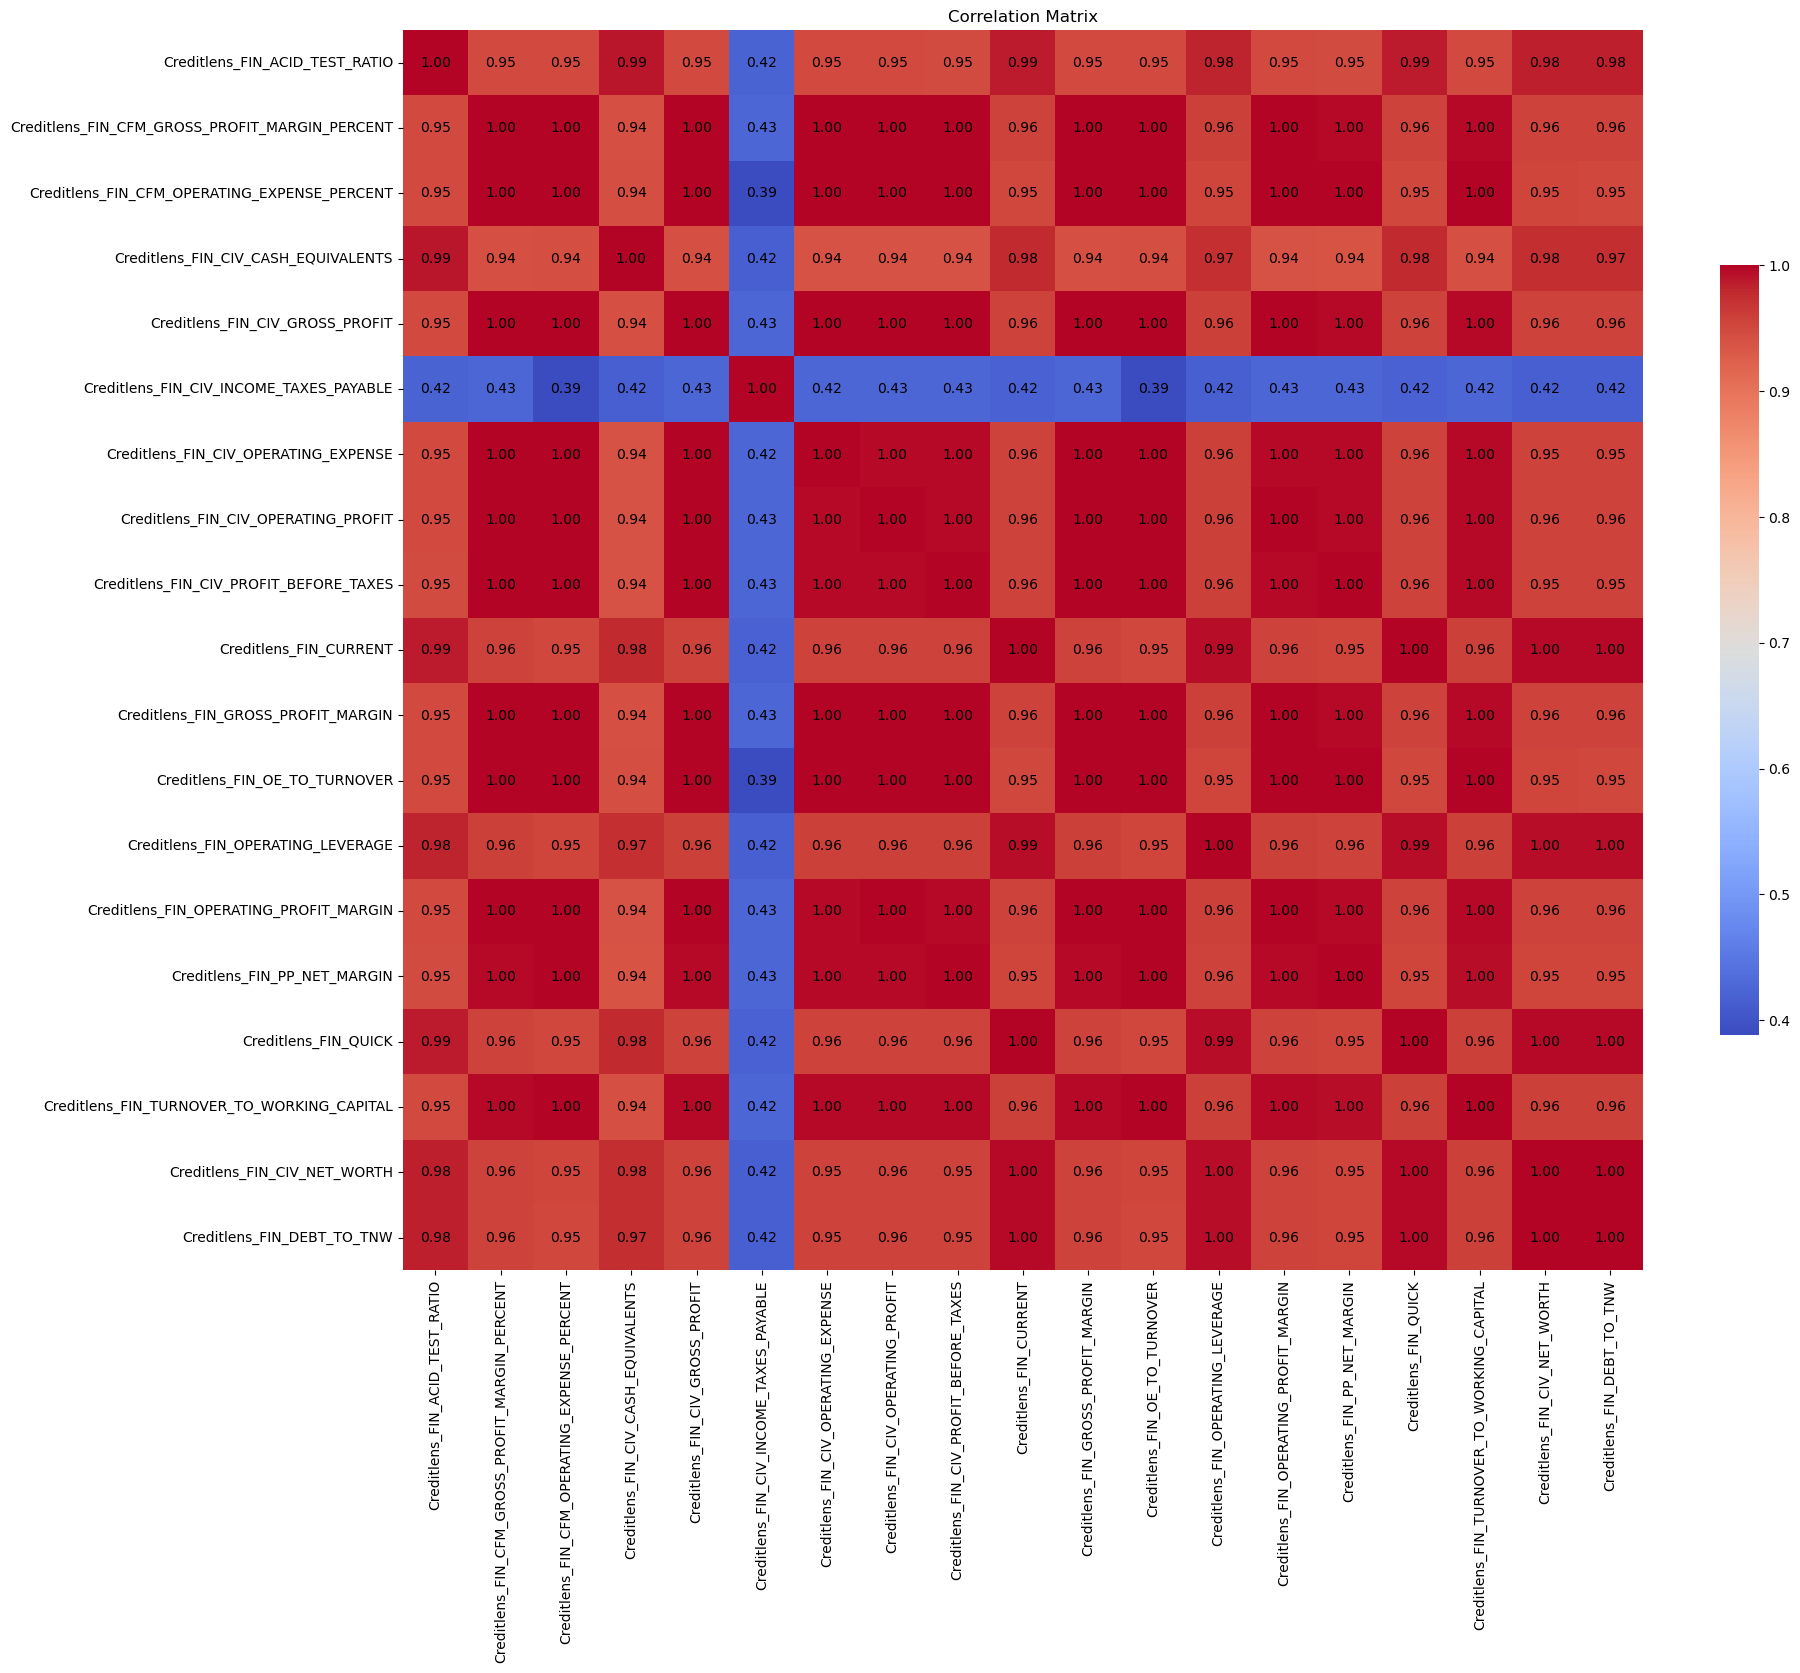

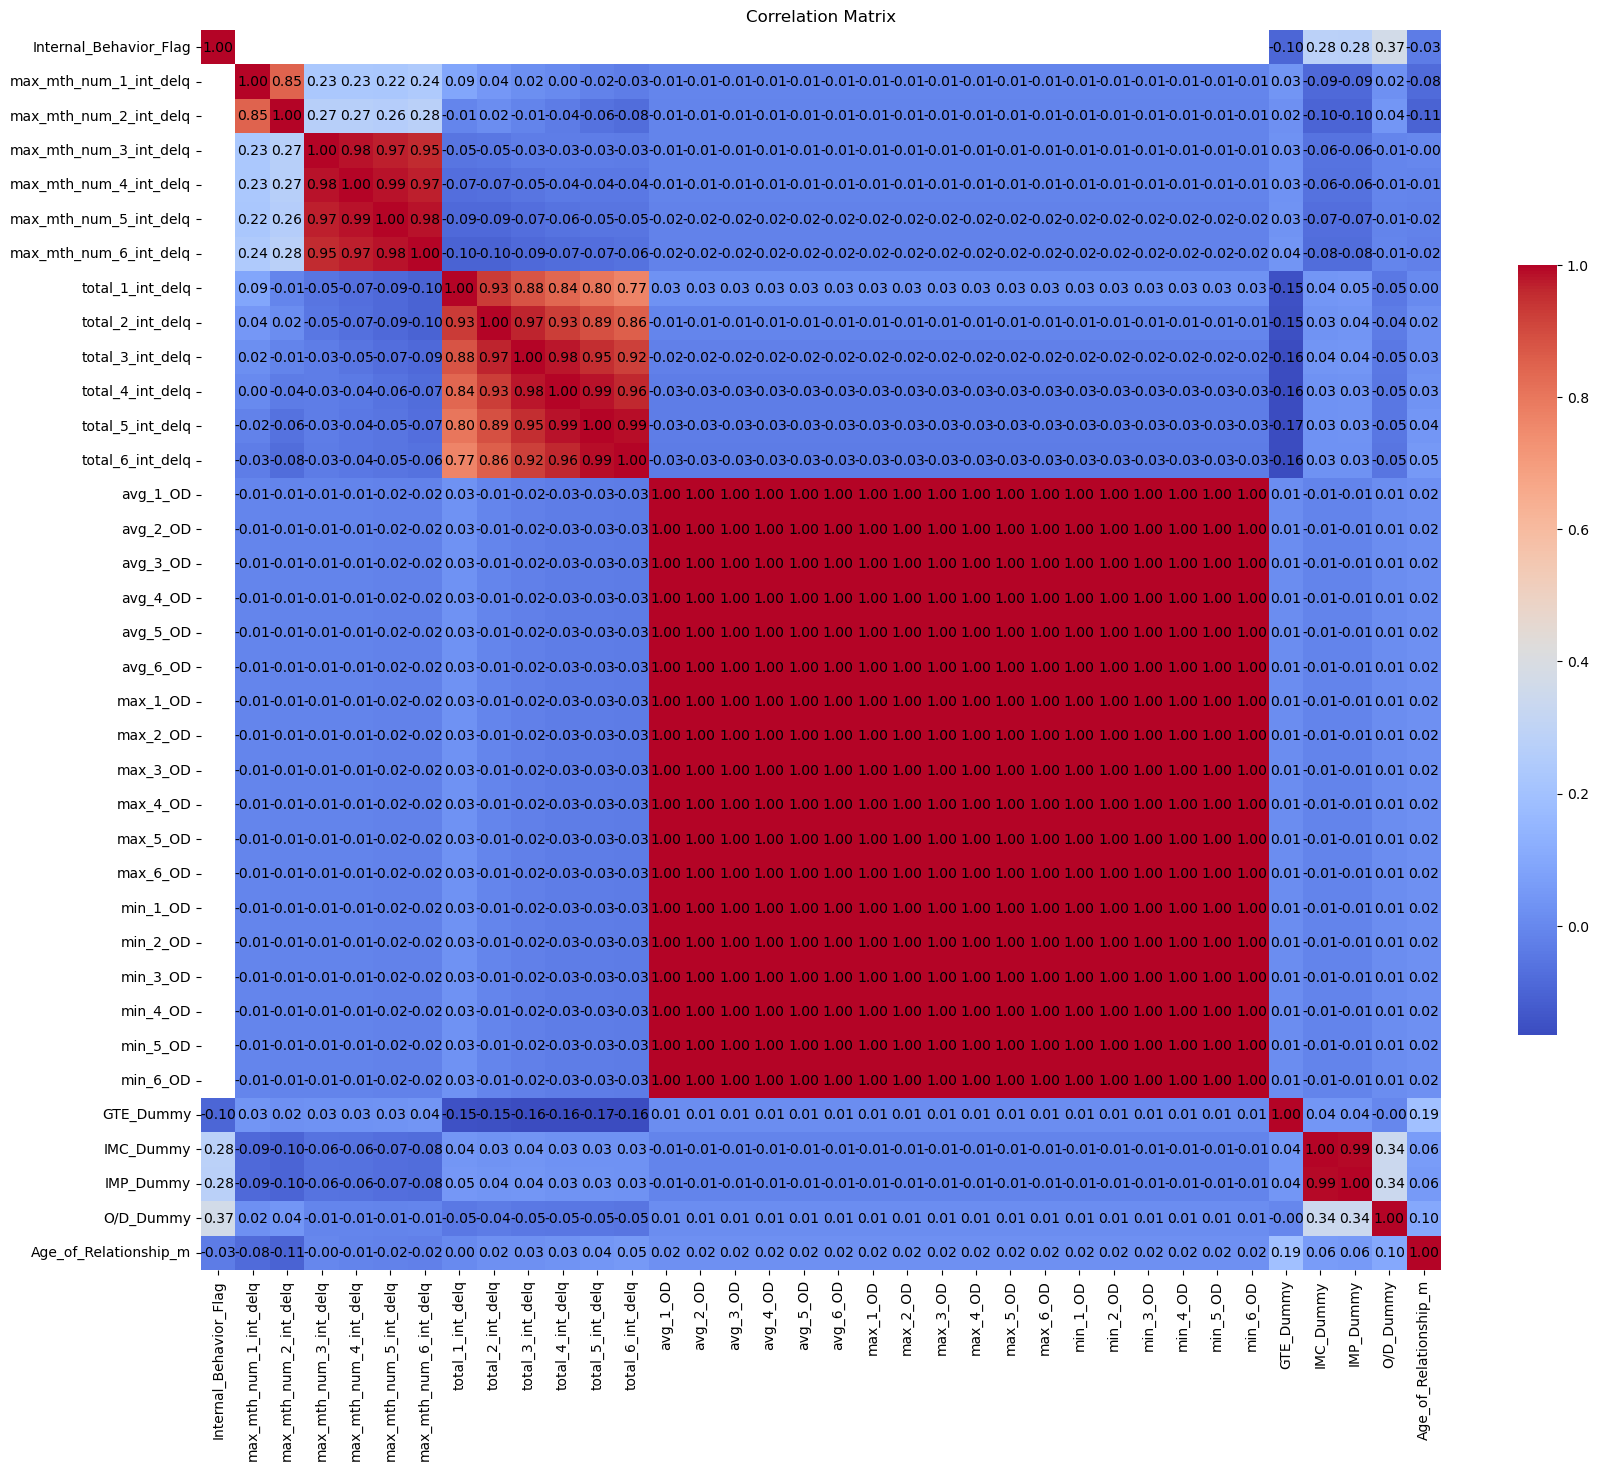

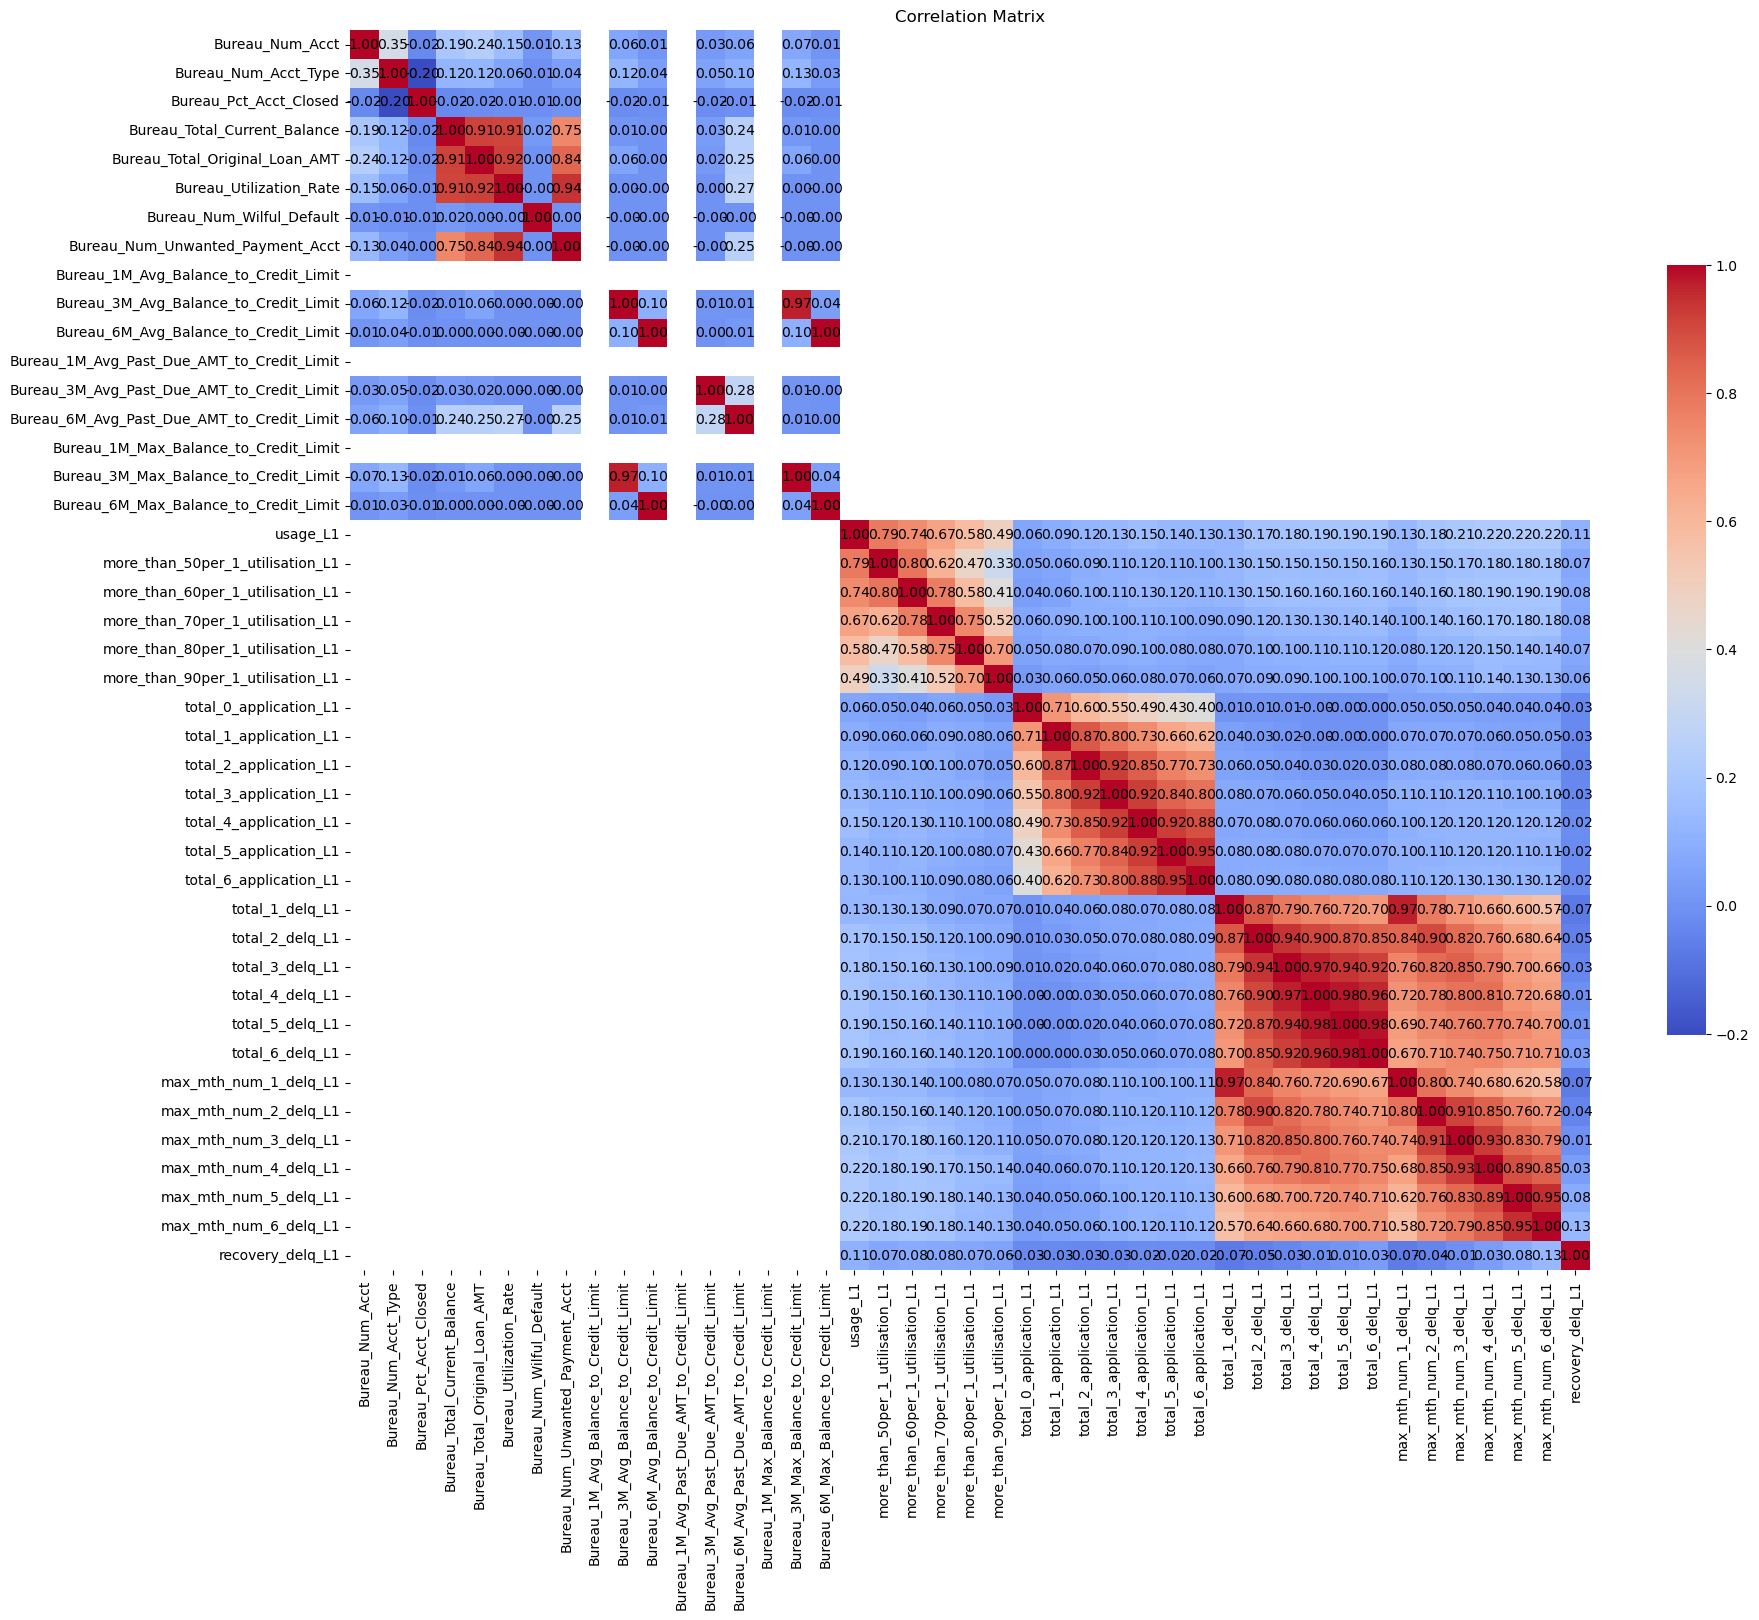

In [11]:
for feature_group in [financial_variables, internal_behavior_variables, bureau_variables]:
    # 计算相关系数矩阵
    corr_matrix = df[feature_group].corr()

    # 设置较大的图尺寸以便显示更多的特征
    plt.figure(figsize=(20, 20))  # 根据特征数量和显示需求调整这里的尺寸

    # 使用Seaborn绘制热图
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .5},
                square=True, annot_kws={'size': 10, "color": "black"})  # 调整annot_kws中的'size'以适应文本大小
    
    plt.title('Correlation Matrix')
    plt.show()


# Modeling

In [17]:
# 分层划分训练集和测试集
y = df['ModelChoice_Default_Flag']
X = df.drop(['ModelChoice_Default_Flag'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df[['ModelChoice_Default_Flag', 'Segment2']])# 初始化缩放器


## Baseline

In [ ]:
X_train_baseline_encoded = pd.get_dummies(X_train[baseline_var], drop_first=True)

In [ ]:
def objective(trial):
    # 为XGBoost定义超参数搜索空间
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'tree_method': 'exact',  # 可以设置为 'hist' 或 'gpu_hist'（如果使用GPU）
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.6, 0.7, 0.8, 0.9, 1.0]),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    # 五折交叉验证
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    roc_auc = []

    for train_index, test_index in kf.split(X_train_baseline_encoded, y_train):
        train_X, valid_X = X_train_baseline_encoded.iloc[train_index], X_train_baseline_encoded.iloc[test_index]
        train_y, valid_y = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # 创建和训练模型
        baseline = xgb.XGBClassifier(**param)
        baseline.fit(train_X, train_y, eval_metric='logloss')
        
        # 预测和评估
        preds = baseline.predict_proba(valid_X)[:, 1]
        roc_auc.append(roc_auc_score(valid_y, preds))
    
    # 返回五折平均ROC AUC
    return sum(roc_auc) / len(roc_auc)

# 创建Optuna研究对象，开始调优
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 输出最优参数
print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2024-04-30 17:19:52,344] A new study created in memory with name: no-name-6e992f52-ffeb-4942-85d4-4d8cb59af3a1
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1857322788.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1857322788.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1857322788.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://

Best trial:
  Value: 0.7532672468553601
  Params: 
    lambda: 0.3948899954452125
    alpha: 0.022264299475295075
    colsample_bytree: 0.6
    subsample: 0.7
    learning_rate: 0.013879386841943557
    n_estimators: 416
    max_depth: 7
    min_child_weight: 1


### Test

In [ ]:
X_test_baseline_encoded = pd.get_dummies(X_test[baseline_var], drop_first=True)

In [ ]:
# 使用study.best_trial.params来获取最佳参数
best_params = study.best_trial.params

# 创建一个新的模型实例，使用最佳参数
baseline = xgb.XGBClassifier(**best_params, objective='binary:logistic', verbosity=0)

# 训练模型，这里使用整个训练数据集
baseline.fit(X_train_baseline_encoded, y_train, eval_metric='logloss')

# 预测测试集的概率
preds_proba = baseline.predict_proba(X_test_baseline_encoded)[:, 1]

# 计算并打印ROC AUC分数
roc_auc = roc_auc_score(y_test, preds_proba)
print(f'Test ROC AUC: {roc_auc:.4f}')
print()

/Users/jellyma/miniforge3/envs/sklearn-env/lib/python3.12/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Test ROC AUC: 0.7744



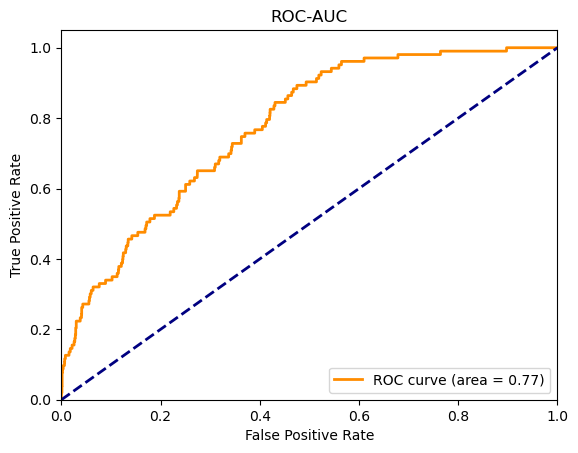

In [ ]:
# 计算真正例率（TPR）和假正例率（FPR）
fpr, tpr, thresholds = roc_curve(y_test, preds_proba)

# 计算AUC-ROC的值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_baseline = baseline.predict(X_test_baseline_encoded)

# 评估模型
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2740
           1       0.67      0.02      0.04       103

    accuracy                           0.96      2843
   macro avg       0.82      0.51      0.51      2843
weighted avg       0.95      0.96      0.95      2843



## Model 1

### Modular: XGBoost

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
val_list = [financial_variables, internal_behavior_variables, bureau_variables]
best_params_list_1 = []
model_list_1 = []
for i in range(3):
    X_train_used = X_train_ros[val_list[i]]
    def objective(trial):
        # 超参数搜索范围
        param = {
            'verbosity': 0,
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1),
            'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10)  # 加权处理类不平衡
        }

        # 定义模型
        model = xgb.XGBClassifier(**param)

        # 使用交叉验证计算得分
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train_used, y_train_ros, cv=kf, scoring='roc_auc')

        # 最大化平均准确率
        return scores.mean()

    # 创建study对象
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    # 打印最佳试验结果
    print(f"Best trial accuracy: {study.best_trial.value}")
    print("Best params: ", study.best_trial.params)

    # 使用最佳参数重新训练模型
    best_params_list_1.append(study.best_trial.params)
    model1 = xgb.XGBClassifier(**study.best_trial.params)
    model1.fit(X_train_used, y_train_ros)
    model_list_1.append(model1)

[I 2024-04-30 17:59:23,117] A new study created in memory with name: no-name-6a40a452-ecaa-412f-9d2f-ee3f8347c78c
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

Best trial accuracy: 0.9876618102098309
Best params:  {'learning_rate': 0.11168455453416687, 'n_estimators': 293, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.7160415244298658, 'colsample_bytree': 0.9349938561250586, 'reg_alpha': 0.0018072058633652615, 'reg_lambda': 0.6459609834875468, 'scale_pos_weight': 9.994415951625948}


[I 2024-04-30 23:53:47,226] A new study created in memory with name: no-name-3152d3ae-d7c6-485c-9729-0e885e56d494
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

Best trial accuracy: 0.9768093499618382
Best params:  {'learning_rate': 0.4988849937903381, 'n_estimators': 228, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8868067074482877, 'colsample_bytree': 0.682528451712255, 'reg_alpha': 0.0001642262336889634, 'reg_lambda': 0.469622560801439, 'scale_pos_weight': 4.761670309825819}


[I 2024-05-01 00:21:01,530] A new study created in memory with name: no-name-0d5415d6-e589-4a47-a561-304afd693f34
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/2825349730.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

Best trial accuracy: 0.871993169464918
Best params:  {'learning_rate': 0.404285896828894, 'n_estimators': 293, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8396965010379126, 'colsample_bytree': 0.7716110832270279, 'reg_alpha': 0.15168924310366955, 'reg_lambda': 0.05154768798656418, 'scale_pos_weight': 7.819360285227418}


In [ ]:
# the Probability as lable 1
for i in range(3):
    X_train_ros['modular'+str(i)] = model_list_1[i].predict_proba(X_train_ros[val_list[i]])[:, 1]

/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/306063893.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_ros['modular'+str(i)] = model_list_1[i].predict_proba(X_train_ros[val_list[i]])[:, 1]
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/306063893.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_ros['modular'+str(i)] = model_list_1[i].predict_proba(X_train_ros[val_list[i]])[:, 1]
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/306063893.py:3: PerformanceWar

In [ ]:
X_train_ros.head()

Site  Customer ID  Creditlens_FIN_ACID_TEST_RATIO  \
0   AA        58280                        1.739484   
1   BB        59866                        0.249934   
2   VV        59276                        1.139500   
3   VV        61229                        0.929781   
4   BB        54922                        0.069234   

   Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
0                                       17.042837   
1                                       23.253335   
2                                       21.174103   
3                                       21.838887   
4                                      -17.674537   

   Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
0                                      7.974175   
1                                     29.339910   
2                                           NaN   
3                                           NaN   
4                                     22.851833   

   Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
0                            28.601071                        22.186751   
1                             1.145538                        32.706195   
2                            40.614389                        29.781722   
3                            21.480153                        30.716751   
4                             1.856631                       -24.859524   

   Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
0                             4.458664e+00   
1                             1.000000e+11   
2                             2.400586e+00   
3                             5.434457e-01   
4                             1.000000e+11   

   Creditlens_FIN_CIV_OPERATING_EXPENSE  Creditlens_FIN_CIV_OPERATING_PROFIT  \
0                             10.711527                            16.374572   
1                             34.224098                             4.532100   
2                             27.769186                             7.743764   
3                             37.583896                            -0.928235   
4                             47.520357                           -70.689518   

   ...  max_mth_num_5_delq_L1  max_mth_num_6_delq_L1  recovery_delq_L1  \
0  ...                    NaN                    NaN               NaN   
1  ...                    1.0                    1.0               0.0   
2  ...                    NaN                    NaN               NaN   
3  ...                    NaN                    NaN               NaN   
4  ...                    0.0                    0.0               0.0   

   Age_of_Company_in_Years  Age_Category               Segment  Segment2  \
0                16.250000   10-20 years  AA_10-20 years_1_0_0  AA_1_0_0   
1                35.583333   20-50 years  BB_20-50 years_1_0_0  BB_1_0_0   
2                10.000000   10-20 years  VV_10-20 years_0_1_0  VV_0_1_0   
3                20.750000   20-50 years  VV_20-50 years_0_0_0  VV_0_0_0   
4                 7.416667    6-10 years   BB_6-10 years_1_0_0  BB_1_0_0   

   modular0  modular1  modular2  
0  0.005142  0.000196  0.005482  
1  0.015533  0.000285  0.058119  
2  0.001530  0.000002  0.852781  
3  0.000746  0.952696  0.852781  
4  0.000057  0.053570  0.000160  

[5 rows x 111 columns]

### Segment: Logistic

In [ ]:
X_train_ros[['modular0', 'modular1','modular2']].isna().sum()

modular0    0
modular1    0
modular2    0
dtype: int64

In [ ]:
# 假设df是完整的DataFrame
segments = df['Segment2'].unique()  # 获取所有独特的segment

imputers_per_segment = {}  # 用于存储每个segment的KNNImputer
train_data = pd.concat([X_train_ros, y_train_ros], axis=1)
models_per_segment_1 = {}

X_var_seg = ['Age_Category', 'modular0', 'modular1', 'modular2']
train_model1_encoded = pd.get_dummies(train_data[X_var_seg + ['ModelChoice_Default_Flag']], drop_first=True)
train_model1_encoded = pd.concat([train_model1_encoded, train_data['Segment2']], axis = 1)
train_model1_encoded.head()

for segment in segments:
    segment_data = train_model1_encoded[train_model1_encoded['Segment2'] == segment]

    # 分离特征和目标变量
    X_seg = segment_data.loc[:, ~segment_data.columns.isin(['ModelChoice_Default_Flag', 'Segment2'])]
    y_seg = segment_data['ModelChoice_Default_Flag']

    # 划分训练集和测试集
    X_train_seg, X_test_seg, y_train_seg, y_test_seg = train_test_split(X_seg, y_seg, test_size=0.2, random_state=42, stratify=segment_data['ModelChoice_Default_Flag'])

    # # 填补缺失值
    # knn_imputer = KNNImputer(n_neighbors=3)
    # X_imputed_train = knn_imputer.fit_transform(X_train_seg)
    # imputers_per_segment[segment] = knn_imputer  # 存储imputer

    
    # 创建逻辑回归模型
    model = LogisticRegression()
    model.fit(X_train_seg, y_train_seg)  # 训练模型

    # 在测试集上评估模型
    # X_imputed_test = knn_imputer.transform(X_test_seg)
    y_pred = model.predict(X_test_seg)
    print(f"Segment - Classification Report:")
    print(classification_report(y_test_seg, y_pred))

    # 存储模型
    models_per_segment_1[segment] = model

Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       303
           1       0.99      1.00      1.00       624

    accuracy                           0.99       927
   macro avg       1.00      0.99      0.99       927
weighted avg       0.99      0.99      0.99       927

Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       165
           1       1.00      1.00      1.00       244

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       171
           1       0.95      1.00      0.97       233

    accuracy                           0.97       404
   macro avg       0.97      

### Test

In [ ]:
y_test_1 = y_test.copy()
X_test_1 = X_test.copy()

In [ ]:
for i in range(3):
    X_test_1['modular'+str(i)] = model_list_1[i].predict_proba(X_test_1[val_list[i]])[:, 1]

In [ ]:
# 初始化空的Series用于存储所有预测信息
y_pred_total_1 = pd.Series(index=X_test_1.index, dtype='int')
y_pred_prob_1 = pd.Series(index=X_test_1.index, dtype='int')

test_data = pd.concat([X_test_1, y_test_1], axis=1)
test_model1_encoded = pd.get_dummies(test_data[X_var_seg + ['ModelChoice_Default_Flag']], drop_first=True)
test_model1_encoded = pd.concat([test_model1_encoded, test_data['Segment2']], axis = 1)
# 对每个segment进行预处理和预测
for segment, model in models_per_segment_1.items():
    # 选出当前segment的测试数据
    segment_indices = test_model1_encoded['Segment2'] == segment
    X_test_segment = test_model1_encoded.loc[segment_indices, ~test_model1_encoded.columns.isin(['ModelChoice_Default_Flag', 'Segment2'])]  # 确保使用正确的特征变量列表

    # 应用KNNImputer
    # imputer = imputers_per_segment[segment]
    # X_imputed_ori_test = imputer.transform(X_test_segment)

    # 进行预测
    model = models_per_segment_1[segment]
    y_pred_segment = model.predict(X_test_segment)
    # 预测测试集的概率
    preds_proba = model.predict_proba(X_test_segment)[:, 1]

    # 存储预测结果
    y_pred_total_1.loc[segment_indices] = y_pred_segment
    y_pred_prob_1.loc[segment_indices] = preds_proba


# 计算并打印ROC AUC分数
roc_auc = roc_auc_score(y_test_1, y_pred_prob_1)
print(f'Test ROC AUC: {roc_auc:.4f}')
print()

Test ROC AUC: 0.5246



In [ ]:
# 评估模型
print(classification_report(y_test_1, y_pred_total_1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2740
           1       0.09      0.07      0.08       103

    accuracy                           0.94      2843
   macro avg       0.53      0.52      0.52      2843
weighted avg       0.93      0.94      0.94      2843



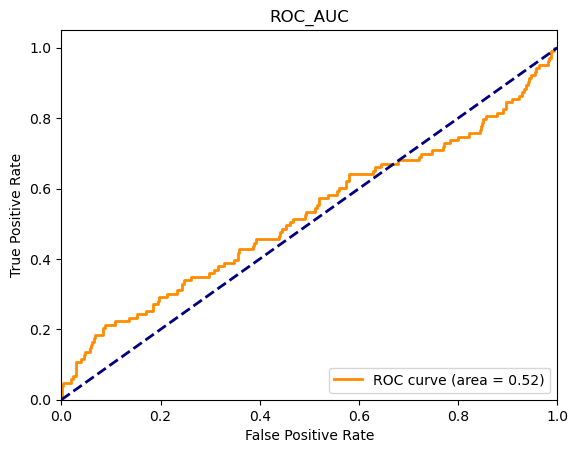

In [ ]:
# 计算真正例率（TPR）和假正例率（FPR）
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_prob_1)

# 计算AUC-ROC的值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(y_test_1, [1 if x > 0.5 else 0 for x in X_test_1['modular0']]))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2740
           1       0.07      0.34      0.12       103

    accuracy                           0.81      2843
   macro avg       0.52      0.58      0.50      2843
weighted avg       0.94      0.81      0.87      2843



In [ ]:
print(classification_report(y_test_1, [1 if x > 0.5 else 0 for x in X_test_1['modular1']]))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2740
           1       0.05      0.20      0.08       103

    accuracy                           0.82      2843
   macro avg       0.51      0.52      0.49      2843
weighted avg       0.93      0.82      0.87      2843



In [ ]:
print(classification_report(y_test_1, [1 if x > 0.5 else 0 for x in X_test_1['modular2']]))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58      2740
           1       0.03      0.48      0.06       103

    accuracy                           0.42      2843
   macro avg       0.49      0.45      0.32      2843
weighted avg       0.92      0.42      0.56      2843



## Model 2：

### Dealing with outliers firstly

In [ ]:
# 假设 `modules` 字典已经被定义，包含各个模块和它们对应的变量名列表
modules = {
    'financial_variables': financial_variables,
    'internal_behavior_variables': internal_behavior_variables,
    'bureau_variables': bureau_variables
}

lower_quantile_segment = {}
upper_quantile_segment = {}
X_train_outlier = X_train.copy()

for module_name, variables in modules.items():
    X = X_train_outlier[variables].copy()
    X = X[abs(X) < 1e7]  # 过滤极端大的值

    # 计算分位数
    lower_quantile = X.quantile(0.05)
    upper_quantile = X.quantile(0.95)

    # 存储每个模块的分位数信息
    lower_quantile_segment[module_name] = lower_quantile
    upper_quantile_segment[module_name] = upper_quantile

    # 对每一列应用替换逻辑
    for col in X.columns:
        if set(X[col].unique()).issubset({0, 1}):
            continue  # 如果是哑变量，则跳过这一列

        X.loc[X[col] <= lower_quantile[col], col] = lower_quantile[col]
        X.loc[X[col] >= upper_quantile[col], col] = upper_quantile[col]

    # 正确地更新数据集，这里 `variables` 应该是一个列名列表
    X_train_outlier.loc[:, variables] = X


In [ ]:
X_train_outlier.head()

Site  Customer ID  Creditlens_FIN_ACID_TEST_RATIO  \
3572    AA        58280                        1.739484   
8404    BB        59866                        0.249934   
10589   VV        59276                        1.139500   
13427   VV        61229                        0.929781   
9601    BB        54922                        0.069234   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
3572                                        17.042837   
8404                                        23.253335   
10589                                       21.174103   
13427                                       21.838887   
9601                                         2.306582   

       Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
3572                                       7.974175   
8404                                      29.339910   
10589                                           NaN   
13427                                           NaN   
9601                                      22.851833   

       Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
3572                             28.601071                        22.186751   
8404                              1.145538                        32.706195   
10589                            40.614389                        29.781722   
13427                            21.480153                        30.716751   
9601                              1.856631                         2.678654   

       Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
3572                                  4.458664   
8404                                       NaN   
10589                                 2.400586   
13427                                 0.543446   
9601                                       NaN   

       Creditlens_FIN_CIV_OPERATING_EXPENSE  \
3572                              10.711527   
8404                              34.224098   
10589                             27.769186   
13427                             37.583896   
9601                              47.520357   

       Creditlens_FIN_CIV_OPERATING_PROFIT  ...  max_mth_num_2_delq_L1  \
3572                             16.374572  ...                    NaN   
8404                              4.532100  ...                    1.0   
10589                             7.743764  ...                    NaN   
13427                            -0.928235  ...                    NaN   
9601                            -28.791336  ...                    0.0   

       max_mth_num_3_delq_L1  max_mth_num_4_delq_L1  max_mth_num_5_delq_L1  \
3572                     NaN                    NaN                    NaN   
8404                     1.0                    1.0                    1.0   
10589                    NaN                    NaN                    NaN   
13427                    NaN                    NaN                    NaN   
9601                     0.0                    0.0                    0.0   

       max_mth_num_6_delq_L1  recovery_delq_L1  Age_of_Company_in_Years  \
3572                     NaN               NaN                16.250000   
8404                     1.0               0.0                35.583333   
10589                    NaN               NaN                10.000000   
13427                    NaN               NaN                20.750000   
9601                     0.0               0.0                 7.416667   

       Age_Category               Segment  Segment2  
3572    10-20 years  AA_10-20 years_1_0_0  AA_1_0_0  
8404    20-50 years  BB_20-50 years_1_0_0  BB_1_0_0  
10589   10-20 years  VV_10-20 years_0_1_0  VV_0_1_0  
13427   20-50 years  VV_20-50 years_0_0_0  VV_0_0_0  
9601     6-10 years   BB_6-10 years_1_0_0  BB_1_0_0  

[5 rows x 108 columns]

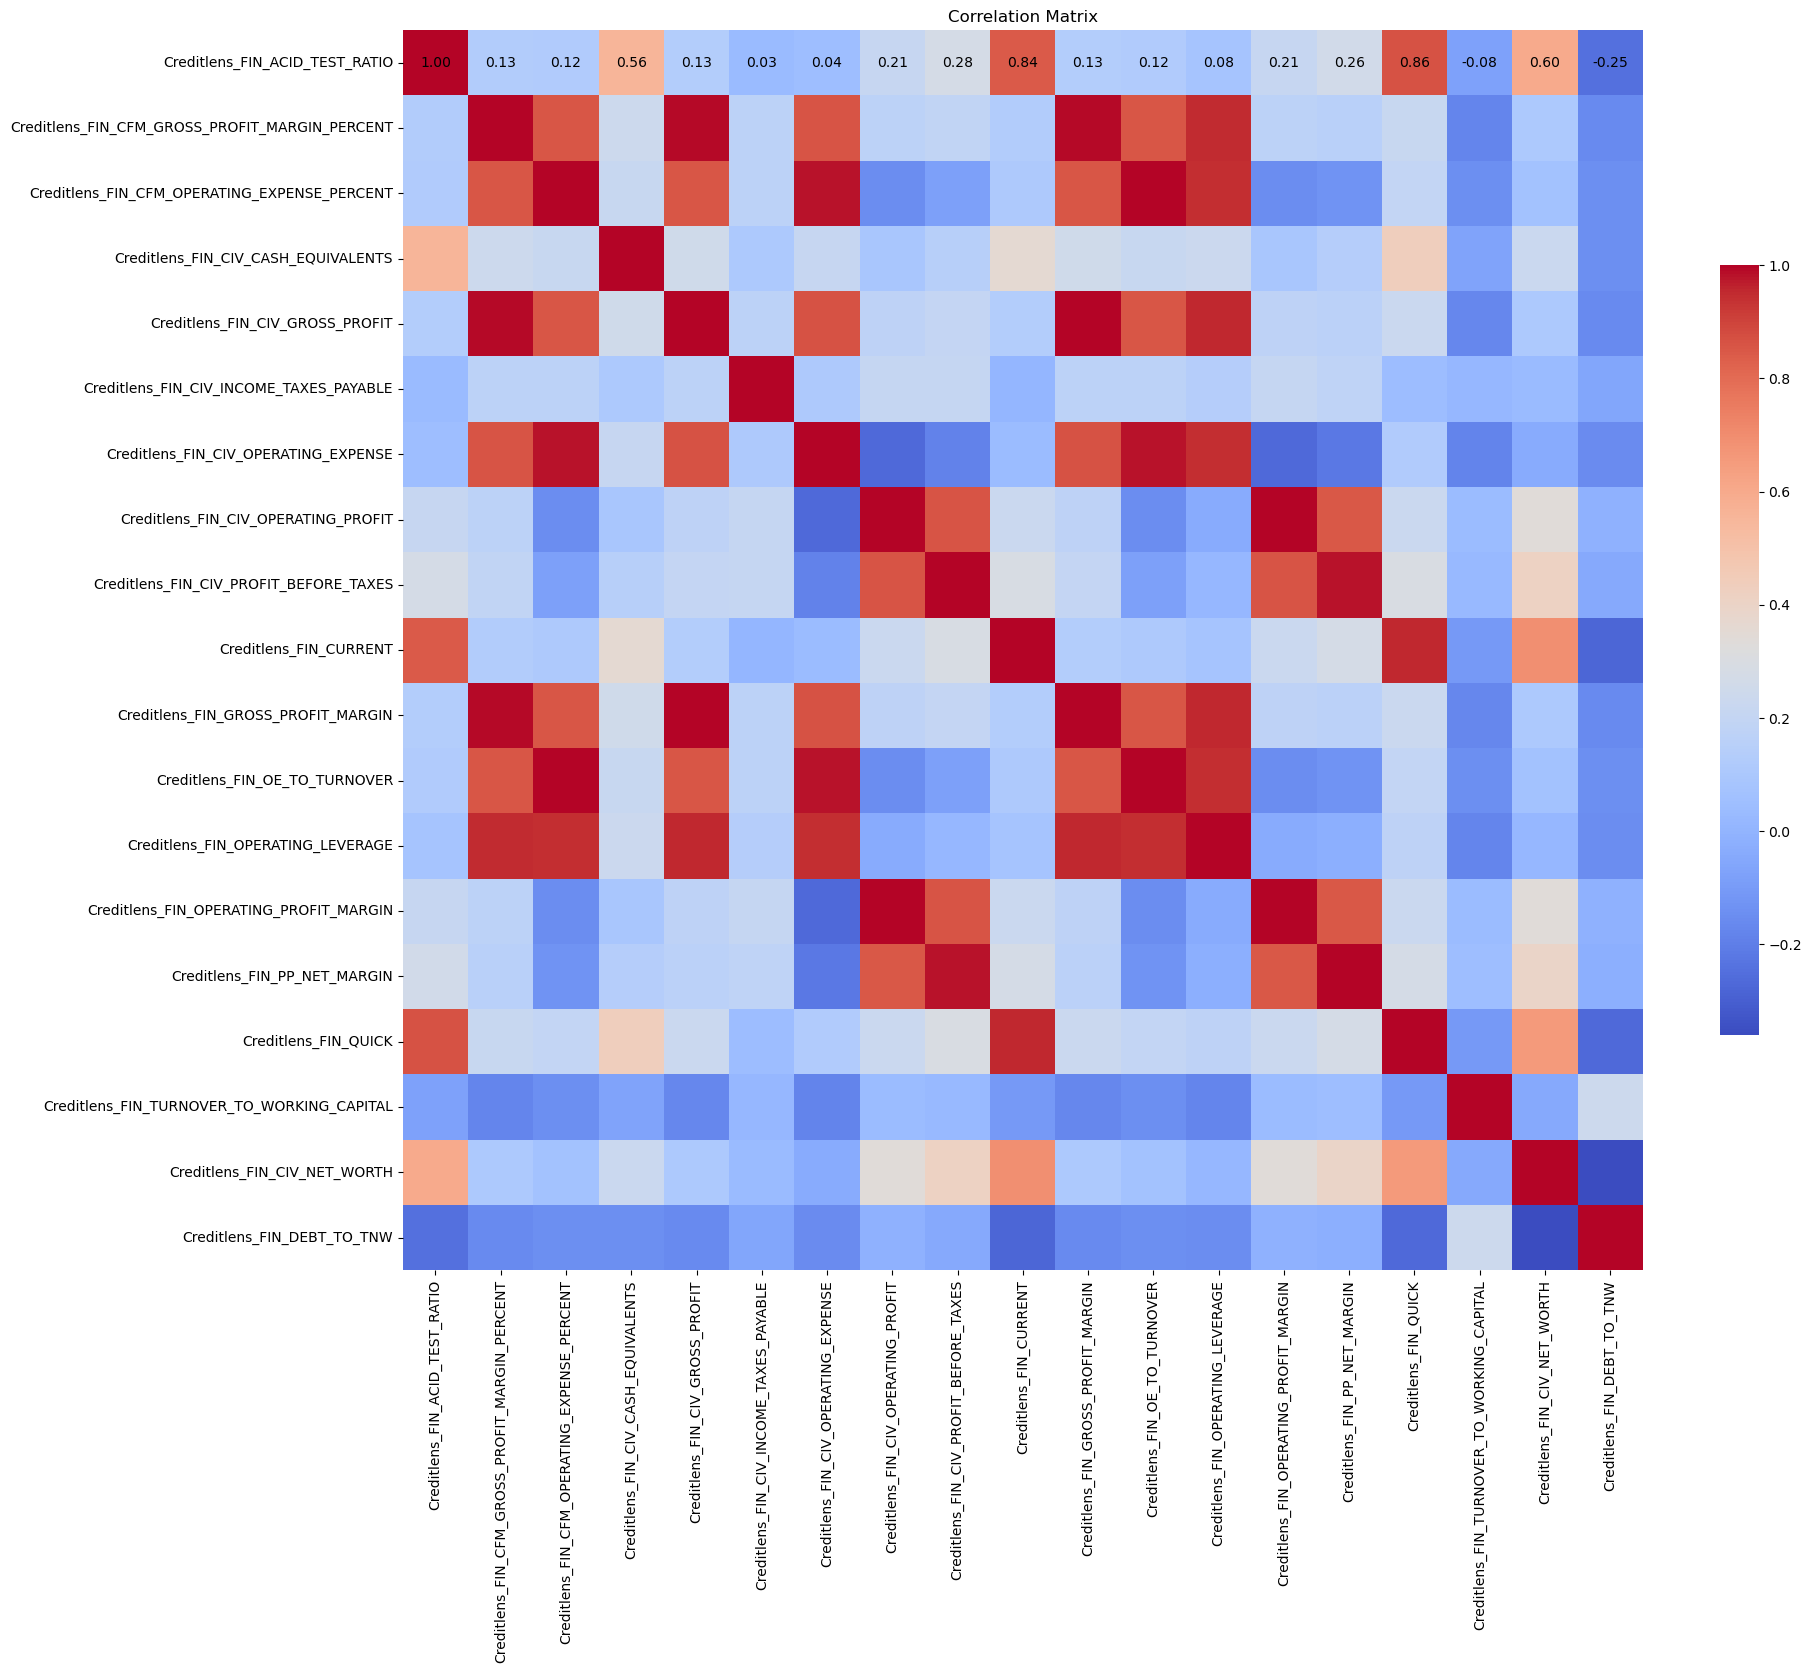

/Users/jellyma/miniforge3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


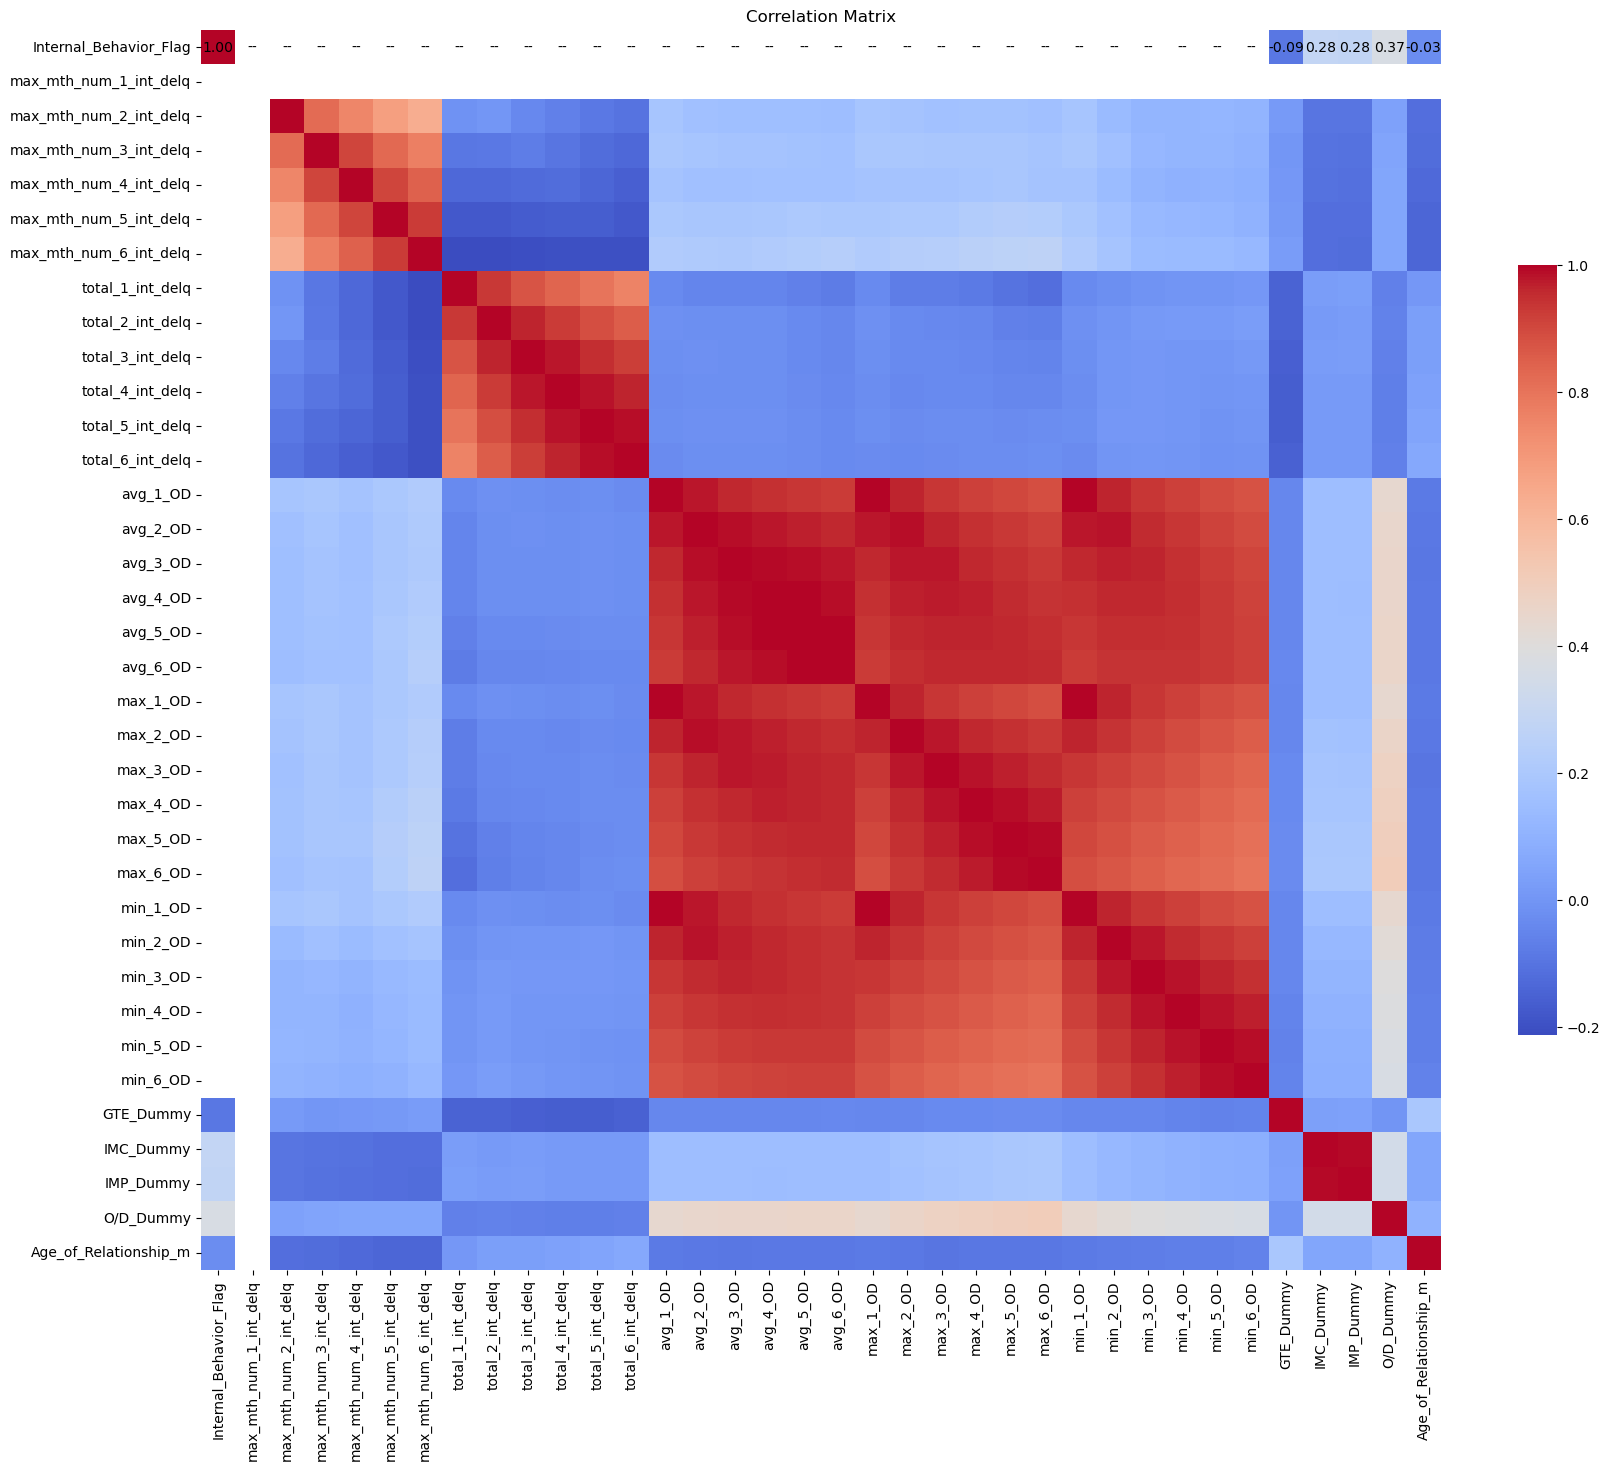

/Users/jellyma/miniforge3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


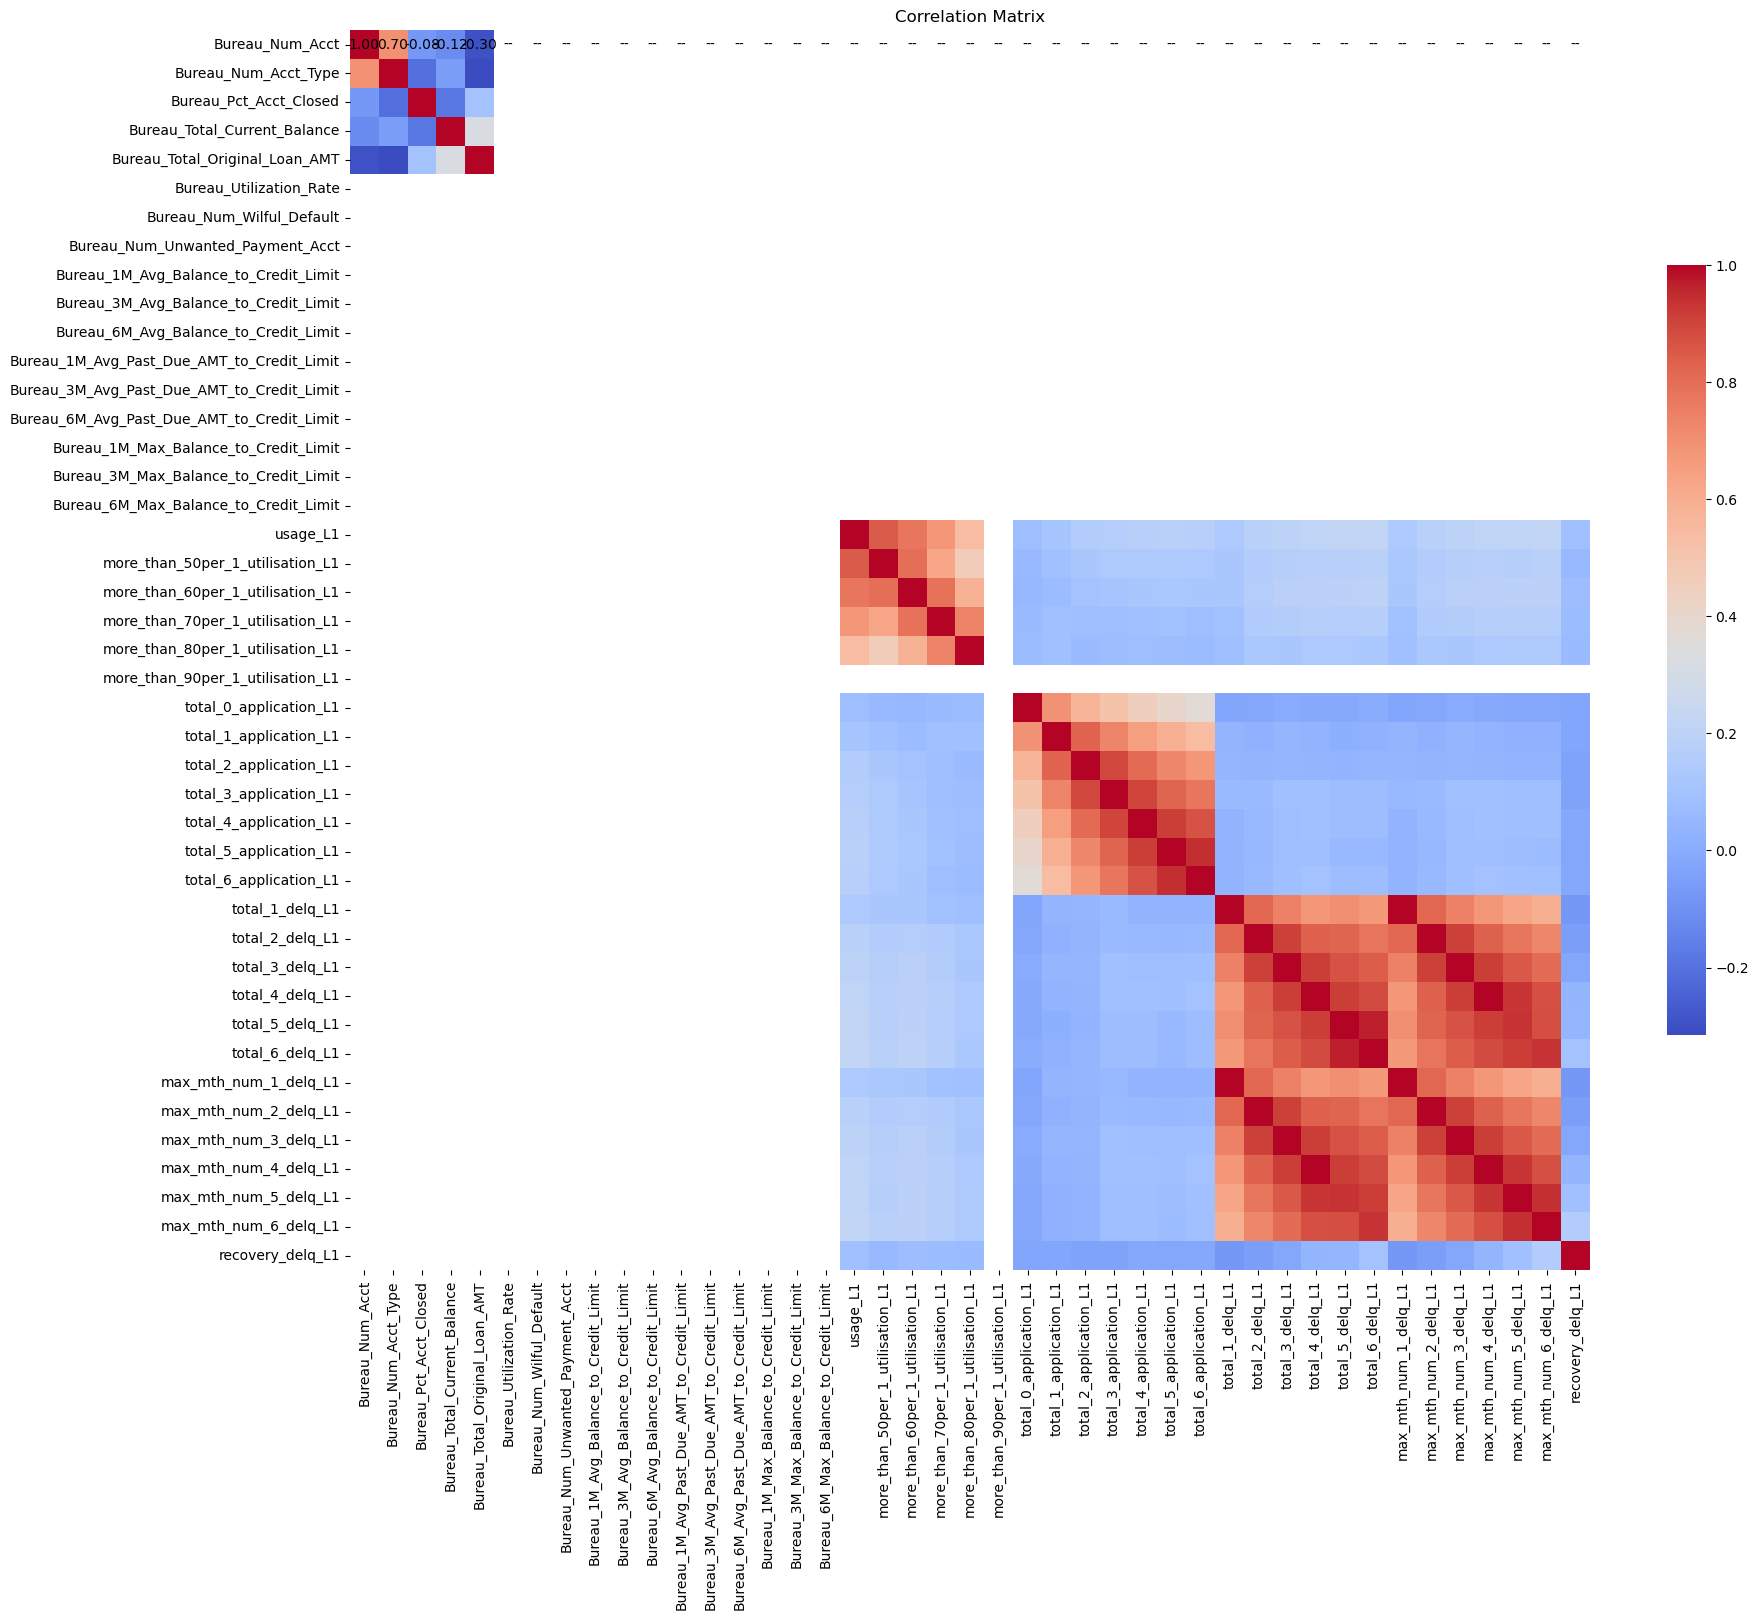

In [ ]:
for feature_group in [financial_variables, internal_behavior_variables, bureau_variables]:
    # 计算相关系数矩阵
    corr_matrix = X_train_outlier[feature_group].corr()

    # 设置较大的图尺寸以便显示更多的特征
    plt.figure(figsize=(20, 20))  # 根据特征数量和显示需求调整这里的尺寸

    # 使用Seaborn绘制热图
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .5},
                square=True, annot_kws={'size': 10, "color": "black"})  # 调整annot_kws中的'size'以适应文本大小
    
    plt.title('Correlation Matrix')
    plt.show()


### Imputing Nan and Applying PCA

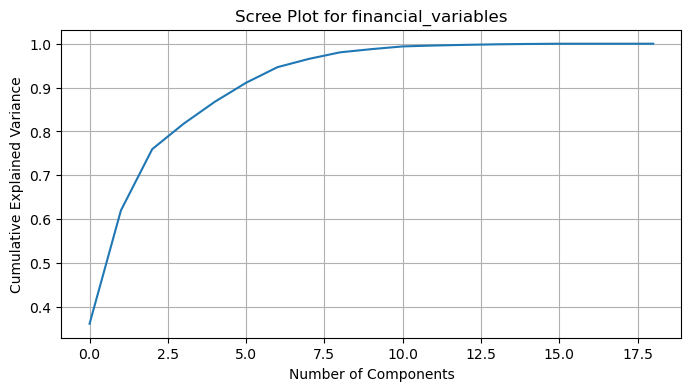

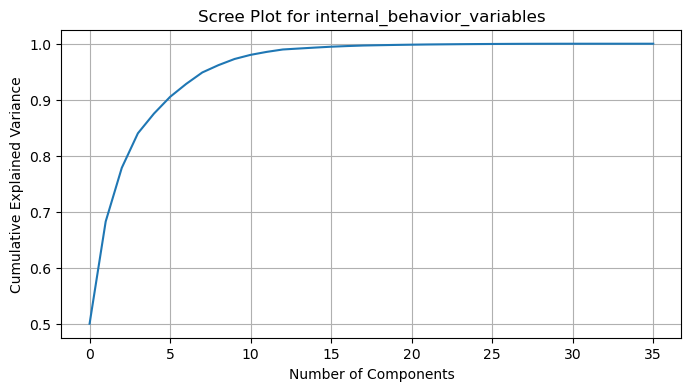

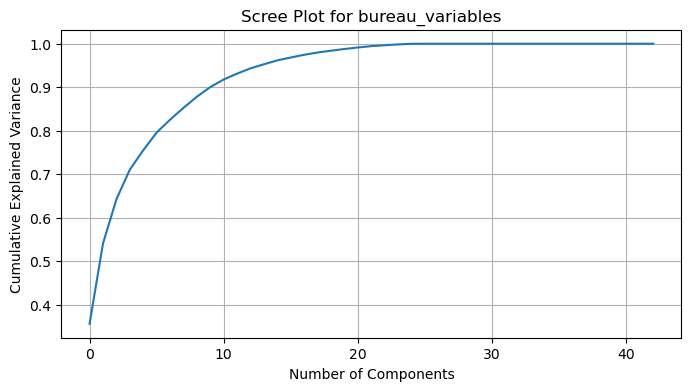

       Creditlens_FIN_ACID_TEST_RATIO  \
3572                         0.994343   
8404                        -0.884335   
10589                        0.237620   
13427                       -0.026886   
9601                        -1.112242   
...                               ...   
5927                        -0.982723   
4068                        -0.720526   
8773                         0.136571   
2215                        -0.974070   
5501                         0.002307   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
3572                                        -0.439346   
8404                                        -0.113083   
10589                                       -0.222313   
13427                                       -0.187390   
9601                                        -1.213504   
...                                               ...   
5927                                        -0.830592   
4068                                        -1.0972

In [ ]:
modules = {
    'financial_variables': financial_variables,
    'internal_behavior_variables': internal_behavior_variables,
    'bureau_variables': bureau_variables
}

transformers = {}
processed_modules = {}
pca_models = {}

for module_name, variables in modules.items():
    # 初始化transformers字典为每个模块创建一个空字典
    transformers[module_name] = {}

    # 选择模块中的变量
    X = X_train_outlier[variables]
    
    # 分离出含缺失值和不含缺失值的列
    columns_with_na = X.columns[X.isna().any()]
    columns_without_na = X.columns[~X.isna().any()]
    
    if len(columns_with_na) > 0:
        # 对含缺失值的列进行归一化处理
        scaler_min_max = MinMaxScaler()
        X_normalized = scaler_min_max.fit_transform(X[columns_with_na])
        transformers[module_name]['scaler_min_max'] = scaler_min_max

        # 使用 KNNImputer 填充缺失值
        imputer = KNNImputer(n_neighbors=int(round(np.sqrt(len(variables)))))
        X_imputed = imputer.fit_transform(X_normalized)
        transformers[module_name]['imputer'] = imputer

        # 创建 DataFrame
        X_imputed_df = pd.DataFrame(X_imputed, columns=columns_with_na, index=X.index)
    else:
        # 如果没有缺失值的列，直接创建一个空的DataFrame
        X_imputed_df = pd.DataFrame(index=X.index)

    # 合并填补后的数据与原始无缺失值数据
    if len(columns_without_na) > 0:
        X_combined = pd.concat([X_imputed_df, X[columns_without_na]], axis=1)
    else:
        X_combined = X_imputed_df

    # 标准化处理
    scaler_std = StandardScaler()
    X_standardized = scaler_std.fit_transform(X_combined)
    transformers[module_name]['scaler_std'] = scaler_std

    # 存储处理后的数据
    processed_modules[module_name] = pd.DataFrame(X_standardized, columns=X_combined.columns, index=X.index)

    # 应用PCA
    pca = PCA()
    pca.fit(X_standardized)
    pca_models[module_name] = pca

    # 绘制崖底随石图
    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Scree Plot for {module_name}')
    plt.grid(True)
    plt.show()
    
    # 存储每个模块的PCA模型和变换器
    transformers[module_name]['pca'] = pca

# 合并处理后的模块数据
X_train_imputed = pd.concat(processed_modules.values(), axis=1)
print(X_train_imputed)

In [ ]:
for module in [financial_variables, internal_behavior_variables, bureau_variables]:
    print(len(module))

19
36
43


In [ ]:
pca_components = {
    'financial_variables': 10,
    'internal_behavior_variables': 15,
    'bureau_variables': 20
}

# 对每个模块应用新的PCA
for module_name, components in pca_components.items():

    X_scaled = processed_modules[module_name]
    
    # 应用新的PCA
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X_scaled)
    
    # 保存新的PCA模型
    transformers[module_name]['pca'] = pca

    # 保存PCA变换后的数据
    pca_columns = [f'PC{i+1}' for i in range(components)]
    processed_modules[module_name] = pd.DataFrame(X_pca, columns=pca_columns, index=processed_modules[module_name].index)

    # 打印出每个模块的PCA解释方差比例
    print(f'Explained Variance Ratio for {module_name}: {pca.explained_variance_ratio_}')

# 如果需要，可以将所有模块的数据合并为一个DataFrame
final_data = pd.concat(processed_modules.values(), axis=1)
print(final_data.head())


Explained Variance Ratio for financial_variables: [0.36127589 0.25828536 0.13991968 0.05783771 0.05028894 0.04342239
 0.03550649 0.01878738 0.01506005 0.00725301]
Explained Variance Ratio for internal_behavior_variables: [0.50100451 0.18218434 0.09564528 0.06153595 0.03518893 0.02974634
 0.02310528 0.0203916  0.01299504 0.01097623 0.007405   0.00528666
 0.0042684  0.00171575 0.00167481]
Explained Variance Ratio for bureau_variables: [0.35630285 0.18453528 0.10161492 0.06816283 0.04457823 0.04071762
 0.02954305 0.02716386 0.02566359 0.02219167 0.01742043 0.01349727
 0.01212936 0.00934023 0.00898445 0.00652933 0.00625872 0.00518915
 0.00422202 0.00379976]
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
3572  -1.020489 -2.937262 -0.103445  0.449965  2.600290  0.980013  0.421244   
8404  -0.557246  0.423163 -0.981309 -0.577192 -0.018999 -1.067066 -0.028633   
10589 -0.331211 -0.913459 -0.198591  0.849848  1.280217  1.138969 -1.212087   
13427 -0.099223  0.580

In [ ]:
X_train.head()

Site  Customer ID  Creditlens_FIN_ACID_TEST_RATIO  \
3572    AA        58280                        1.739484   
8404    BB        59866                        0.249934   
10589   VV        59276                        1.139500   
13427   VV        61229                        0.929781   
9601    BB        54922                        0.069234   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
3572                                        17.042837   
8404                                        23.253335   
10589                                       21.174103   
13427                                       21.838887   
9601                                       -17.674537   

       Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
3572                                       7.974175   
8404                                      29.339910   
10589                                           NaN   
13427                                           NaN   
9601                                      22.851833   

       Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
3572                             28.601071                        22.186751   
8404                              1.145538                        32.706195   
10589                            40.614389                        29.781722   
13427                            21.480153                        30.716751   
9601                              1.856631                       -24.859524   

       Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
3572                              4.458664e+00   
8404                              1.000000e+11   
10589                             2.400586e+00   
13427                             5.434457e-01   
9601                              1.000000e+11   

       Creditlens_FIN_CIV_OPERATING_EXPENSE  \
3572                              10.711527   
8404                              34.224098   
10589                             27.769186   
13427                             37.583896   
9601                              47.520357   

       Creditlens_FIN_CIV_OPERATING_PROFIT  ...  max_mth_num_2_delq_L1  \
3572                             16.374572  ...                    NaN   
8404                              4.532100  ...                    1.0   
10589                             7.743764  ...                    NaN   
13427                            -0.928235  ...                    NaN   
9601                            -70.689518  ...                    0.0   

       max_mth_num_3_delq_L1  max_mth_num_4_delq_L1  max_mth_num_5_delq_L1  \
3572                     NaN                    NaN                    NaN   
8404                     1.0                    1.0                    1.0   
10589                    NaN                    NaN                    NaN   
13427                    NaN                    NaN                    NaN   
9601                     0.0                    0.0                    0.0   

       max_mth_num_6_delq_L1  recovery_delq_L1  Age_of_Company_in_Years  \
3572                     NaN               NaN                16.250000   
8404                     1.0               0.0                35.583333   
10589                    NaN               NaN                10.000000   
13427                    NaN               NaN                20.750000   
9601                     0.0               0.0                 7.416667   

       Age_Category               Segment  Segment2  
3572    10-20 years  AA_10-20 years_1_0_0  AA_1_0_0  
8404    20-50 years  BB_20-50 years_1_0_0  BB_1_0_0  
10589   10-20 years  VV_10-20 years_0_1_0  VV_0_1_0  
13427   20-50 years  VV_20-50 years_0_0_0  VV_0_0_0  
9601     6-10 years   BB_6-10 years_1_0_0  BB_1_0_0  

[5 rows x 108 columns]

In [ ]:
final_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
3572  -1.020489 -2.937262 -0.103445  0.449965  2.600290  0.980013  0.421244   
8404  -0.557246  0.423163 -0.981309 -0.577192 -0.018999 -1.067066 -0.028633   
10589 -0.331211 -0.913459 -0.198591  0.849848  1.280217  1.138969 -1.212087   
13427 -0.099223  0.580982  0.849284 -0.378471 -0.247457  0.059507 -0.673943   
9601  -2.689824  6.285937  1.570088  1.275637 -0.367844  1.370196  2.192034   

            PC8       PC9      PC10  ...      PC11      PC12      PC13  \
3572  -0.575853 -0.139642 -0.008350  ... -0.030831  0.038347 -0.053488   
8404   0.402256 -0.107986  0.025198  ...  0.010452 -1.328987 -0.920131   
10589  0.209440 -0.192937  0.129665  ...  0.011411  0.033450 -0.046927   
13427  0.628994 -0.438677 -0.052073  ...  0.011411  0.033450 -0.046927   
9601   0.606440 -0.337768 -0.064308  ...  0.016287 -0.579306  0.727685   

           PC14      PC15      PC16      PC17      PC18      PC19      PC20  
3572   0.610338  0.003473  0.026354 -0.007105  0.017826  0.001977 -0.000181  
8404   0.000223  3.771818  0.673220 -0.768535 -1.529717  0.800748  0.429121  
10589 -0.000854  0.003243  0.023915 -0.006450  0.016216  0.001802 -0.000165  
13427 -0.000854  0.003243  0.023915 -0.006450  0.016216  0.001802 -0.000165  
9601  -0.001053 -2.409929 -0.443586  0.243319 -0.540629  1.621550  0.307670  

[5 rows x 45 columns]

In [ ]:
# columns_to_segment_by_2是包含列名的列表，这些列的信息要加入到final_data中
# 从X_train_outlier选择这些列
Age_col = ['Age_Category', 'Age_of_Company_in_Years']
additional_columns = X_train_outlier[columns_to_segment_by_2 + Age_col]

# 将这些列合并到final_data中，确保沿列方向合并(axis=1)
final_data = pd.concat([final_data, additional_columns], axis=1)

# 查看合并后的数据
final_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
3572  -1.020489 -2.937262 -0.103445  0.449965  2.600290  0.980013  0.421244   
8404  -0.557246  0.423163 -0.981309 -0.577192 -0.018999 -1.067066 -0.028633   
10589 -0.331211 -0.913459 -0.198591  0.849848  1.280217  1.138969 -1.212087   
13427 -0.099223  0.580982  0.849284 -0.378471 -0.247457  0.059507 -0.673943   
9601  -2.689824  6.285937  1.570088  1.275637 -0.367844  1.370196  2.192034   

            PC8       PC9      PC10  ...      PC17      PC18      PC19  \
3572  -0.575853 -0.139642 -0.008350  ... -0.007105  0.017826  0.001977   
8404   0.402256 -0.107986  0.025198  ... -0.768535 -1.529717  0.800748   
10589  0.209440 -0.192937  0.129665  ... -0.006450  0.016216  0.001802   
13427  0.628994 -0.438677 -0.052073  ... -0.006450  0.016216  0.001802   
9601   0.606440 -0.337768 -0.064308  ...  0.243319 -0.540629  1.621550   

           PC20  Site  Industry_Manufacturing_Flag  \
3572  -0.000181    AA                            1   
8404   0.429121    BB                            1   
10589 -0.000165    VV                            0   
13427 -0.000165    VV                            0   
9601   0.307670    BB                            1   

       Industry_Wholesale_Trade_Flag  Industry_Services_Flag  Age_Category  \
3572                               0                       0   10-20 years   
8404                               0                       0   20-50 years   
10589                              1                       0   10-20 years   
13427                              0                       0   20-50 years   
9601                               0                       0    6-10 years   

       Age_of_Company_in_Years  
3572                 16.250000  
8404                 35.583333  
10589                10.000000  
13427                20.750000  
9601                  7.416667  

[5 rows x 51 columns]

### Modular: XGBoost

In [ ]:
final_data.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC1', 'PC2', 'PC3', 'PC4',
       'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
       'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'Site',
       'Industry_Manufacturing_Flag', 'Industry_Wholesale_Trade_Flag',
       'Industry_Services_Flag', 'Age_Category', 'Age_of_Company_in_Years'],
      dtype='object')

In [ ]:
# 定义每组变量的PCA主成分数
pca_counts = {
    'financial': 10,
    'internal_behavior': 15,
    'bureau': 20
}

# 开始构建新的列名列表
new_column_names = []

# 追踪当前PCA主成分的起始位置
start_index = 0

# 对每组变量进行循环
for group_name, count in pca_counts.items():
    # 为每个主成分生成新的列名，格式为"group_name_PCX"
    new_column_names.extend([f'{group_name}_PC{i+1}' for i in range(count)])
    # 更新起始索引位置
    start_index += count

# 添加额外的非PCA列
additional_cols = ['Site', 'Industry_Manufacturing_Flag', 'Industry_Wholesale_Trade_Flag', 
                   'Industry_Services_Flag', 'Age_Category', 'Age_of_Company_in_Years']
new_column_names.extend(additional_cols)

# 确保新的列名列表长度与final_data的列数相同
assert len(new_column_names) == final_data.shape[1], "Column names list does not match DataFrame column count"

# 应用新的列名到final_data
final_data.columns = new_column_names

# 显示更新后的列名以验证
print(final_data.columns)

Index(['financial_PC1', 'financial_PC2', 'financial_PC3', 'financial_PC4',
       'financial_PC5', 'financial_PC6', 'financial_PC7', 'financial_PC8',
       'financial_PC9', 'financial_PC10', 'internal_behavior_PC1',
       'internal_behavior_PC2', 'internal_behavior_PC3',
       'internal_behavior_PC4', 'internal_behavior_PC5',
       'internal_behavior_PC6', 'internal_behavior_PC7',
       'internal_behavior_PC8', 'internal_behavior_PC9',
       'internal_behavior_PC10', 'internal_behavior_PC11',
       'internal_behavior_PC12', 'internal_behavior_PC13',
       'internal_behavior_PC14', 'internal_behavior_PC15', 'bureau_PC1',
       'bureau_PC2', 'bureau_PC3', 'bureau_PC4', 'bureau_PC5', 'bureau_PC6',
       'bureau_PC7', 'bureau_PC8', 'bureau_PC9', 'bureau_PC10', 'bureau_PC11',
       'bureau_PC12', 'bureau_PC13', 'bureau_PC14', 'bureau_PC15',
       'bureau_PC16', 'bureau_PC17', 'bureau_PC18', 'bureau_PC19',
       'bureau_PC20', 'Site', 'Industry_Manufacturing_Flag',
       'Indus

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(final_data, y_train)

In [ ]:
financial_pca = ['financial_PC1', 'financial_PC2', 'financial_PC3', 'financial_PC4',
       'financial_PC5', 'financial_PC6', 'financial_PC7', 'financial_PC8',
       'financial_PC9', 'financial_PC10']
internal_behavior_pca = ['internal_behavior_PC1',
       'internal_behavior_PC2', 'internal_behavior_PC3',
       'internal_behavior_PC4', 'internal_behavior_PC5',
       'internal_behavior_PC6', 'internal_behavior_PC7',
       'internal_behavior_PC8', 'internal_behavior_PC9',
       'internal_behavior_PC10', 'internal_behavior_PC11',
       'internal_behavior_PC12', 'internal_behavior_PC13',
       'internal_behavior_PC14', 'internal_behavior_PC15']
bureau_pca = ['bureau_PC1',
       'bureau_PC2', 'bureau_PC3', 'bureau_PC4', 'bureau_PC5', 'bureau_PC6',
       'bureau_PC7', 'bureau_PC8', 'bureau_PC9', 'bureau_PC10', 'bureau_PC11',
       'bureau_PC12', 'bureau_PC13', 'bureau_PC14', 'bureau_PC15',
       'bureau_PC16', 'bureau_PC17', 'bureau_PC18', 'bureau_PC19',
       'bureau_PC20']
val_list = [financial_pca, internal_behavior_pca, bureau_pca]
best_params_list = []
model_list_2 = []
for i in range(3):
    X_train_used = X_train_ros[val_list[i]]
    def objective(trial):
        # 超参数搜索范围
        param = {
            'verbosity': 0,
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1),
            'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10)  # 加权处理类不平衡
        }

        # 定义模型
        model = xgb.XGBClassifier(**param)

        # 使用交叉验证计算得分
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X_train_used, y_train_ros, cv=kf, scoring='roc_auc')

        # 最大化平均准确率
        return scores.mean()

    # 创建study对象
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    # 打印最佳试验结果
    print(f"Best trial accuracy: {study.best_trial.value}")
    print("Best params: ", study.best_trial.params)

    # 使用最佳参数重新训练模型
    best_params_list.append(study.best_trial.params)
    model = xgb.XGBClassifier(**study.best_trial.params)
    model.fit(X_train_used, y_train_ros)
    model_list_2.append(model)

[I 2024-05-01 21:42:04,360] A new study created in memory with name: no-name-aa0bc200-7c14-4f06-b2c7-66807b8a6177


/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  '

Best trial accuracy: 0.9854052922392702
Best params:  {'learning_rate': 0.1105253830671148, 'n_estimators': 292, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.8867119934828915, 'colsample_bytree': 0.5804834670519662, 'reg_alpha': 2.7045814153169276e-05, 'reg_lambda': 0.00011958630520431788, 'scale_pos_weight': 8.72770795822909}


[I 2024-05-01 21:53:27,608] A new study created in memory with name: no-name-b3182abc-a82b-4ace-bf7e-5a1dc5180c01
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

Best trial accuracy: 0.9739176268560736
Best params:  {'learning_rate': 0.16374977653935296, 'n_estimators': 288, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.7416192785482074, 'colsample_bytree': 0.5359627397596524, 'reg_alpha': 0.00013020955411288237, 'reg_lambda': 0.25066301158056553, 'scale_pos_weight': 4.999843516693625}


[I 2024-05-01 22:23:51,350] A new study created in memory with name: no-name-6d6aba43-54b9-4c10-b69a-2070745a1749
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1),
/var/folders/96/jgt7hkqx32dgxbtj_c9vymc80000gn/T/ipykernel_5213/1286023252.py:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

Best trial accuracy: 0.8416146733085315
Best params:  {'learning_rate': 0.2526205511139244, 'n_estimators': 276, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.933497248141438, 'colsample_bytree': 0.7906651867744748, 'reg_alpha': 0.03268237309026743, 'reg_lambda': 0.7524738796210808, 'scale_pos_weight': 9.483322014832098}


In [ ]:
# the Probability as lable 1
for i in range(3):
    X_train_ros['modular'+str(i)] = model_list_2[i].predict_proba(X_train_ros[val_list[i]])[:, 1]

In [ ]:
X_train_ros.head()

financial_PC1  financial_PC2  financial_PC3  financial_PC4  financial_PC5  \
0      -1.020489      -2.937262      -0.103445       0.449965       2.600290   
1      -0.557246       0.423163      -0.981309      -0.577192      -0.018999   
2      -0.331211      -0.913459      -0.198591       0.849848       1.280217   
3      -0.099223       0.580982       0.849284      -0.378471      -0.247457   
4      -2.689824       6.285937       1.570088       1.275637      -0.367844   

   financial_PC6  financial_PC7  financial_PC8  financial_PC9  financial_PC10  \
0       0.980013       0.421244      -0.575853      -0.139642       -0.008350   
1      -1.067066      -0.028633       0.402256      -0.107986        0.025198   
2       1.138969      -1.212087       0.209440      -0.192937        0.129665   
3       0.059507      -0.673943       0.628994      -0.438677       -0.052073   
4       1.370196       2.192034       0.606440      -0.337768       -0.064308   

   ...  bureau_PC20  Site  Industry_Manufacturing_Flag  \
0  ...    -0.000181    AA                            1   
1  ...     0.429121    BB                            1   
2  ...    -0.000165    VV                            0   
3  ...    -0.000165    VV                            0   
4  ...     0.307670    BB                            1   

   Industry_Wholesale_Trade_Flag  Industry_Services_Flag  Age_Category  \
0                              0                       0   10-20 years   
1                              0                       0   20-50 years   
2                              1                       0   10-20 years   
3                              0                       0   20-50 years   
4                              0                       0    6-10 years   

   Age_of_Company_in_Years  modular0  modular1  modular2  
0                16.250000  0.001410  0.010716  0.000462  
1                35.583333  0.005759  0.005067  0.074783  
2                10.000000  0.000193  0.000160  0.876188  
3                20.750000  0.000940  0.879200  0.876188  
4                 7.416667  0.006183  0.007301  0.000005  

[5 rows x 54 columns]

### Segment: Logistic

In [ ]:
# 假设df是完整的DataFrame
train_data = pd.concat([X_train_ros, y_train_ros], axis=1)
columns_to_segment_by_2 = ['Site', 'Industry_Manufacturing_Flag', 'Industry_Wholesale_Trade_Flag', 'Industry_Services_Flag']
# 创建一个新的列'Segment'，它是你指定的所有列的组合
train_data['Segment2'] = train_data[columns_to_segment_by_2].apply(lambda x: '_'.join(x.astype(str)), axis=1)
train_data.head()

financial_PC1  financial_PC2  financial_PC3  financial_PC4  financial_PC5  \
0      -1.020489      -2.937262      -0.103445       0.449965       2.600290   
1      -0.557246       0.423163      -0.981309      -0.577192      -0.018999   
2      -0.331211      -0.913459      -0.198591       0.849848       1.280217   
3      -0.099223       0.580982       0.849284      -0.378471      -0.247457   
4      -2.689824       6.285937       1.570088       1.275637      -0.367844   

   financial_PC6  financial_PC7  financial_PC8  financial_PC9  financial_PC10  \
0       0.980013       0.421244      -0.575853      -0.139642       -0.008350   
1      -1.067066      -0.028633       0.402256      -0.107986        0.025198   
2       1.138969      -1.212087       0.209440      -0.192937        0.129665   
3       0.059507      -0.673943       0.628994      -0.438677       -0.052073   
4       1.370196       2.192034       0.606440      -0.337768       -0.064308   

   ...  Industry_Manufacturing_Flag  Industry_Wholesale_Trade_Flag  \
0  ...                            1                              0   
1  ...                            1                              0   
2  ...                            0                              1   
3  ...                            0                              0   
4  ...                            1                              0   

   Industry_Services_Flag  Age_Category  Age_of_Company_in_Years  modular0  \
0                       0   10-20 years                16.250000  0.001410   
1                       0   20-50 years                35.583333  0.005759   
2                       0   10-20 years                10.000000  0.000193   
3                       0   20-50 years                20.750000  0.000940   
4                       0    6-10 years                 7.416667  0.006183   

   modular1  modular2  ModelChoice_Default_Flag  Segment2  
0  0.010716  0.000462                         0  AA_1_0_0  
1  0.005067  0.074783                         0  BB_1_0_0  
2  0.000160  0.876188                         0  VV_0_1_0  
3  0.879200  0.876188                         0  VV_0_0_0  
4  0.007301  0.000005                         0  BB_1_0_0  

[5 rows x 56 columns]

In [ ]:
train_data['Age_of_Company_in_Years'].isna().sum()

1814

In [ ]:
models_per_segment_2 = {}
imputers_per_segment_2 = {}  # 用于存储每个segment的KNNImputer

X_var_seg = ['Age_of_Company_in_Years', 'modular0', 'modular1', 'modular2']
for segment in segments:
    segment_data = train_data[train_data['Segment2'] == segment]

    # 分离特征和目标变量
    X_seg = segment_data.loc[:, X_var_seg]
    y_seg = segment_data['ModelChoice_Default_Flag']

    # 划分训练集和测试集
    X_train_seg, X_test_seg, y_train_seg, y_test_seg = train_test_split(X_seg, y_seg, test_size=0.2, random_state=42, stratify=segment_data['ModelChoice_Default_Flag'])

    # 填补缺失值
    knn_imputer = KNNImputer(n_neighbors=3)
    X_imputed_train = knn_imputer.fit_transform(X_train_seg)
    imputers_per_segment_2[segment] = knn_imputer  # 存储imputer

    # 创建逻辑回归模型
    model = LogisticRegression()
    model.fit(X_imputed_train, y_train_seg)  # 训练模型

    # 在测试集上评估模型
    X_imputed_test = knn_imputer.transform(X_test_seg)
    y_pred = model.predict(X_imputed_test)
    print(f"Segment - Classification Report:")
    print(classification_report(y_test_seg, y_pred))

    # 存储模型
    models_per_segment_2[segment] = model


Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       303
           1       0.99      1.00      0.99       624

    accuracy                           0.99       927
   macro avg       0.99      0.99      0.99       927
weighted avg       0.99      0.99      0.99       927

Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       165
           1       1.00      1.00      1.00       244

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       171
           1       0.94      1.00      0.97       233

    accuracy                           0.96       404
   macro avg       0.97      

### Test

In [ ]:
modules = {
    'financial_variables': financial_variables,
    'internal_behavior_variables': internal_behavior_variables,
    'bureau_variables': bureau_variables
}

X_test_outlier = X_test.copy()

for module_name, variables in modules.items():
    X = X_test_outlier[variables].copy()
    X = X[abs(X) < 1e7]  # 过滤极端大的值

    # 对每一列应用替换逻辑
    for col in X.columns:
        if set(X[col].unique()).issubset({0, 1}):
            continue  # 如果是哑变量，则跳过这一列

        X.loc[X[col] <= lower_quantile_segment[module_name][col], col] = lower_quantile_segment[module_name][col]
        X.loc[X[col] >= upper_quantile_segment[module_name][col], col] = upper_quantile_segment[module_name][col]

    # 正确地更新数据集，这里 `variables` 应该是一个列名列表
    X_test_outlier.loc[:, variables] = X


In [ ]:
processed_modules_test = {}

for module_name, variables in modules.items():
    # 选择模块中的变量
    X = X_test_outlier[variables]

    # 分离出含缺失值和不含缺失值的列
    columns_with_na = X.columns[X.isna().any()]
    columns_without_na = X.columns[~X.isna().any()]

    # 如果模块中有经过归一化处理的含缺失值的列
    if 'scaler_min_max' in transformers[module_name]:
        # 使用相同的MinMaxScaler变换测试数据
        X_normalized_test = transformers[module_name]['scaler_min_max'].transform(X[columns_with_na])

        # 使用相同的KNNImputer填充测试数据
        X_imputed_test = transformers[module_name]['imputer'].transform(X_normalized_test)

        # 创建填补后的DataFrame
        X_imputed_df_test = pd.DataFrame(X_imputed_test, columns=columns_with_na, index=X.index)
    else:
        # 如果没有缺失值的列，直接创建一个空的DataFrame
        X_imputed_df_test = pd.DataFrame(index=X.index)

    # 合并填补后的数据与原始无缺失值数据
    if len(columns_without_na) > 0:
        X_combined_test = pd.concat([X_imputed_df_test, X[columns_without_na]], axis=1)
    else:
        X_combined_test = X_imputed_df_test

    # 使用相同的StandardScaler标准化测试数据
    X_standardized_test = transformers[module_name]['scaler_std'].transform(X_combined_test)

    # 使用之前保存的PCA模型进行降维
    pca = transformers[module_name]['pca']
    X_pca_test = pca.transform(X_standardized_test)

    # 创建一个DataFrame来存储PCA转换后的测试数据，使用与训练集相同的列名
    pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
    processed_modules_test[module_name] = pd.DataFrame(X_pca_test, columns=pca_columns, index=X.index)

# 合并处理后的模块测试数据
final_test_data_2 = pd.concat(processed_modules_test.values(), axis=1)
print(final_test_data_2.head())

/Users/jellyma/miniforge3/envs/sklearn-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/jellyma/miniforge3/envs/sklearn-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
8372   3.556084 -3.281644 -3.284619 -1.387907  0.337603 -1.410008  0.849532   
14027  0.022568 -1.720560  2.976062 -0.278717  0.428035 -0.900085  1.460744   
1785   0.958800  0.386177 -2.643873 -1.447478  1.564214  0.694360 -1.279132   
579   -2.085135 -1.328685  0.392003 -0.676896  0.220069 -0.373735 -0.692103   
13563 -0.125533 -0.053704 -0.003591 -0.000375  0.050428  0.007732  0.010049   

            PC8       PC9      PC10  ...      PC11      PC12      PC13  \
8372   0.418352 -0.629526  0.735394  ...  0.011411  0.033450 -0.046927   
14027  0.353073  0.886929  0.713757  ...  0.011411  0.033450 -0.046927   
1785  -1.111110  1.339535  0.249446  ... -0.985911  0.027987 -0.041206   
579    1.210034 -0.185054 -0.283297  ... -1.649531  0.026094 -0.038507   
13563 -0.022019 -0.029829 -0.001147  ...  0.011411  0.033450 -0.046927   

           PC14      PC15      PC16      PC17      PC18      PC19      PC20  
83

/Users/jellyma/miniforge3/envs/sklearn-env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
# columns_to_segment_by_2是包含列名的列表，这些列的信息要加入到final_data中
# 从X_train_outlier选择这些列
Age_col = ['Age_Category', 'Age_of_Company_in_Years']
additional_columns = X_test_outlier[columns_to_segment_by_2 + Age_col]

# 将这些列合并到final_data中，确保沿列方向合并(axis=1)
final_test_data_2 = pd.concat([final_test_data_2, additional_columns], axis=1)

# 修改列名，使与训练集的一致
final_test_data_2.columns = new_column_names

# 查看合并后的数据
final_test_data_2.head()

financial_PC1  financial_PC2  financial_PC3  financial_PC4  \
8372        3.556084      -3.281644      -3.284619      -1.387907   
14027       0.022568      -1.720560       2.976062      -0.278717   
1785        0.958800       0.386177      -2.643873      -1.447478   
579        -2.085135      -1.328685       0.392003      -0.676896   
13563      -0.125533      -0.053704      -0.003591      -0.000375   

       financial_PC5  financial_PC6  financial_PC7  financial_PC8  \
8372        0.337603      -1.410008       0.849532       0.418352   
14027       0.428035      -0.900085       1.460744       0.353073   
1785        1.564214       0.694360      -1.279132      -1.111110   
579         0.220069      -0.373735      -0.692103       1.210034   
13563       0.050428       0.007732       0.010049      -0.022019   

       financial_PC9  financial_PC10  ...  bureau_PC17  bureau_PC18  \
8372       -0.629526        0.735394  ...    -0.006450     0.016216   
14027       0.886929        0.713757  ...    -0.006450     0.016216   
1785        1.339535        0.249446  ...    -0.006043     0.015341   
579        -0.185054       -0.283297  ...    -0.005763     0.014563   
13563      -0.029829       -0.001147  ...    -0.006450     0.016216   

       bureau_PC19  bureau_PC20  Site  Industry_Manufacturing_Flag  \
8372      0.001802    -0.000165    BB                            1   
14027     0.001802    -0.000165    VV                            0   
1785      0.001717    -0.000157    AA                            0   
579       0.001625    -0.000149    AA                            0   
13563     0.001802    -0.000165    VV                            1   

       Industry_Wholesale_Trade_Flag  Industry_Services_Flag  \
8372                               0                       0   
14027                              0                       0   
1785                               0                       0   
579                                1                       0   
13563                              0                       0   

             Age_Category  Age_of_Company_in_Years  
8372          10-20 years                13.416667  
14027  More than 50 years                51.916667  
1785          10-20 years                11.416667  
579           10-20 years                12.000000  
13563             Missing                      NaN  

[5 rows x 51 columns]

In [ ]:
y_test_2 = y_test.copy()

In [ ]:
for i in range(3):
    final_test_data_2['modular'+str(i)] = model_list_2[i].predict_proba(final_test_data_2[val_list[i]])[:, 1]

In [ ]:
final_test_data_2['Segment2'] = final_test_data_2[columns_to_segment_by_2].apply(lambda x: '_'.join(x.astype(str)), axis=1)
final_test_data_2.head()

financial_PC1  financial_PC2  financial_PC3  financial_PC4  \
8372        3.556084      -3.281644      -3.284619      -1.387907   
14027       0.022568      -1.720560       2.976062      -0.278717   
1785        0.958800       0.386177      -2.643873      -1.447478   
579        -2.085135      -1.328685       0.392003      -0.676896   
13563      -0.125533      -0.053704      -0.003591      -0.000375   

       financial_PC5  financial_PC6  financial_PC7  financial_PC8  \
8372        0.337603      -1.410008       0.849532       0.418352   
14027       0.428035      -0.900085       1.460744       0.353073   
1785        1.564214       0.694360      -1.279132      -1.111110   
579         0.220069      -0.373735      -0.692103       1.210034   
13563       0.050428       0.007732       0.010049      -0.022019   

       financial_PC9  financial_PC10  ...  Site  Industry_Manufacturing_Flag  \
8372       -0.629526        0.735394  ...    BB                            1   
14027       0.886929        0.713757  ...    VV                            0   
1785        1.339535        0.249446  ...    AA                            0   
579        -0.185054       -0.283297  ...    AA                            0   
13563      -0.029829       -0.001147  ...    VV                            1   

       Industry_Wholesale_Trade_Flag  Industry_Services_Flag  \
8372                               0                       0   
14027                              0                       0   
1785                               0                       0   
579                                1                       0   
13563                              0                       0   

             Age_Category  Age_of_Company_in_Years  modular0  modular1  \
8372          10-20 years                13.416667  0.000059  0.024877   
14027  More than 50 years                51.916667  0.003735  0.000075   
1785          10-20 years                11.416667  0.001030  0.032570   
579           10-20 years                12.000000  0.005586  0.008107   
13563             Missing                      NaN  0.890296  0.000792   

       modular2  Segment2  
8372   0.876188  BB_1_0_0  
14027  0.876188  VV_0_0_0  
1785   0.915487  AA_0_0_0  
579    0.923027  AA_0_1_0  
13563  0.876188  VV_1_0_0  

[5 rows x 55 columns]

In [ ]:
final_test_data_2['Age_of_Company_in_Years'].isna().sum()

220

In [ ]:
# 要用到的变量
X_var_seg = ['Age_of_Company_in_Years', 'modular0', 'modular1', 'modular2']
# 初始化空的Series用于存储所有预测信息
y_pred_total_2 = pd.Series(index=final_test_data_2.index, dtype='int')
y_pred_prob_2 = pd.Series(index=final_test_data_2.index, dtype='int')   

# 对每个segment进行预处理和预测
for segment, model in models_per_segment_2.items():
    # 选出当前segment的测试数据
    segment_indices = final_test_data_2['Segment2'] == segment
    X_test_segment = final_test_data_2.loc[segment_indices, X_var_seg]  # 确保使用正确的特征变量列表

    # 应用KNNImputer
    imputer = imputers_per_segment_2[segment]
    X_imputed_test = imputer.transform(X_test_segment)

    # 进行预测
    model = models_per_segment_2[segment]
    y_pred_segment = model.predict(X_imputed_test)
    # 预测测试集的概率
    preds_proba = model.predict_proba(X_imputed_test)[:, 1]

    # 存储预测结果
    y_pred_total_2.loc[segment_indices] = y_pred_segment
    y_pred_prob_2.loc[segment_indices] = preds_proba

In [ ]:
# 计算并打印ROC AUC分数
roc_auc = roc_auc_score(y_test_2, y_pred_prob_2)
print(f'Test ROC AUC: {roc_auc:.4f}')
print()

Test ROC AUC: 0.5090



In [ ]:
# 评估模型
print(classification_report(y_test_2, y_pred_total_2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2740
           1       0.03      0.03      0.03       103

    accuracy                           0.93      2843
   macro avg       0.50      0.50      0.50      2843
weighted avg       0.93      0.93      0.93      2843



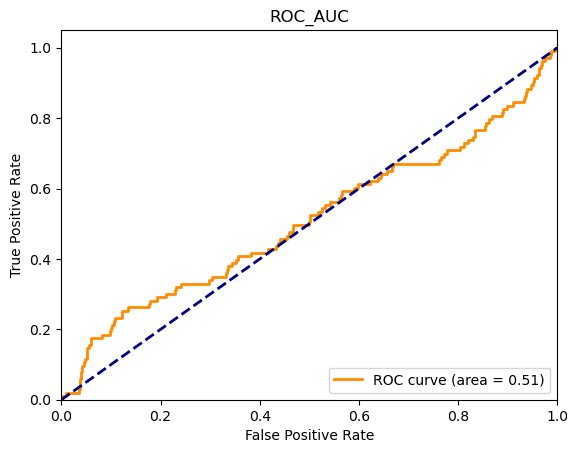

In [ ]:
# 计算真正例率（TPR）和假正例率（FPR）
fpr, tpr, thresholds = roc_curve(y_test_2, y_pred_prob_2)

# 计算AUC-ROC的值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="lower right")
plt.show()

## Model 3:

### Dealing with outliers firstly

In [13]:
X_train_3 = X_train.copy()
y_train_3 = y_train.copy()

# 假设 `modules` 字典已经被定义，包含各个模块和它们对应的变量名列表
modules = {
    'financial_variables': financial_variables,
    'internal_behavior_variables': internal_behavior_variables,
    'bureau_variables': bureau_variables
}

lower_quantile_segment_3 = {}
upper_quantile_segment_3 = {}

for module_name, variables in modules.items():
    X = X_train_3[variables].copy()
    X = X[abs(X) < 1e7]  # 过滤极端大的值

    # 计算分位数
    lower_quantile = X.quantile(0.05)
    upper_quantile = X.quantile(0.95)

    # 存储每个模块的分位数信息
    lower_quantile_segment_3[module_name] = lower_quantile
    upper_quantile_segment_3[module_name] = upper_quantile

    # 对每一列应用替换逻辑
    for col in X.columns:
        if set(X[col].unique()).issubset({0, 1}):
            continue  # 如果是哑变量，则跳过这一列

        X.loc[X[col] <= lower_quantile[col], col] = lower_quantile[col]
        X.loc[X[col] >= upper_quantile[col], col] = upper_quantile[col]

    # 正确地更新数据集，这里 `variables` 应该是一个列名列表
    X_train_3.loc[:, variables] = X

In [14]:
X_train_3 = X_train_3.drop(columns=['Segment', 'Segment2', 'Age_Category'])
X_train_3

Site  Customer ID  Creditlens_FIN_ACID_TEST_RATIO  \
3572    AA        58280                        1.739484   
8404    BB        59866                        0.249934   
10589   VV        59276                        1.139500   
13427   VV        61229                        0.929781   
9601    BB        54922                        0.069234   
...    ...          ...                             ...   
5927    BB        60523                        0.171926   
4068    AA        63846                        0.379814   
8773    BB        57961                        1.059381   
2215    AA        66328                        0.178786   
5501    BB        64238                             NaN   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
3572                                        17.042837   
8404                                        23.253335   
10589                                       21.174103   
13427                                       21.838887   
9601                                         2.306582   
...                                               ...   
5927                                         9.595390   
4068                                         4.518876   
8773                                         2.951393   
2215                                        65.000000   
5501                                              NaN   

       Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
3572                                       7.974175   
8404                                      29.339910   
10589                                           NaN   
13427                                           NaN   
9601                                      22.851833   
...                                             ...   
5927                                      11.119676   
4068                                       2.203428   
8773                                       6.078983   
2215                                      85.891109   
5501                                            NaN   

       Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
3572                             28.601071                        22.186751   
8404                              1.145538                        32.706195   
10589                            40.614389                        29.781722   
13427                            21.480153                        30.716751   
9601                              1.856631                         2.678654   
...                                    ...                              ...   
5927                              1.340112                        13.496072   
4068                              0.334166                         6.344741   
8773                              6.956685                         4.151182   
2215                             10.770227                        91.423560   
5501                                   NaN                              NaN   

       Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
3572                                  4.458664   
8404                                       NaN   
10589                                 2.400586   
13427                                 0.543446   
9601                                       NaN   
...                                        ...   
5927                                       NaN   
4068                                  5.635502   
8773                                       NaN   
2215                                  5.635502   
5501                                       NaN   

       Creditlens_FIN_CIV_OPERATING_EXPENSE  \
3572                              10.711527   
8404                              34.224098   
10589                             27.769186   
13427                             37.583896   
9601                              47.520357   
...                                     ...   
5927                              15.109270   
4068                     

### Imputing Nan and Scaling

In [15]:
modules = {
    'financial_variables': financial_variables,
    'internal_behavior_variables': internal_behavior_variables,
    'bureau_variables': bureau_variables
}

transformers_3 = {}
processed_modules_3 = {}

for module_name, variables in modules.items():
    # 初始化transformers字典为每个模块创建一个空字典
    transformers_3[module_name] = {}

    # 选择模块中的变量
    X = X_train_3[variables]
    
    # 统一进行归一化处理
    scaler_min_max = MinMaxScaler()
    X_normalized = scaler_min_max.fit_transform(X)
    transformers_3[module_name]['scaler_min_max'] = scaler_min_max

    # 使用 KNNImputer 填充缺失值
    imputer = KNNImputer(n_neighbors=int(round(np.sqrt(len(variables)))))
    X_imputed = imputer.fit_transform(X_normalized)
    transformers_3[module_name]['imputer'] = imputer

    # 存储处理后的数据
    processed_modules_3[module_name] = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# 合并处理后的模块数据
X_train_3 = pd.concat(processed_modules_3.values(), axis=1)
print(X_train_3)

       Creditlens_FIN_ACID_TEST_RATIO  \
3572                         0.488128   
8404                         0.055149   
10589                        0.313726   
13427                        0.252765   
9601                         0.002623   
...                               ...   
5927                         0.032473   
4068                         0.092902   
8773                         0.290437   
2215                         0.034467   
5501                         0.259493   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
3572                                         0.235053   
8404                                         0.334114   
10589                                        0.300949   
13427                                        0.311553   
9601                                         0.000000   
...                                               ...   
5927                                         0.116261   
4068                                         0.0352

### Autoencoder

In [22]:
# 设置随机种子
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# train_X_3, valid_X_3, train_y_3, valid_y_3 = train_test_split(X_train_3, y_train_3, test_size=0.2, random_state=seed)

# only use those good samples to analyze
X_train_3_use = X_train_3.loc[y_train_3==0]
X_train_3_encoded = pd.get_dummies(X_train_3_use, drop_first=True)

print(X_train_3_encoded.shape)

# 准备数据集
train_X_3 = torch.tensor(X_train_3_encoded.values, dtype=torch.float32)
input_dim = X_train_3_encoded.shape[1]
encoding_dim = 10 # 编码的维度，也是压缩后的维度
n_sample = train_X_3.shape[0]

(10954, 98)


In [47]:
train_X_3.shape

torch.Size([10954, 98])

In [53]:
from tqdm import tqdm

num_epochs = 1000
batch_size = int(n_sample / 20)

# 定义AutoEncoder模型
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),  # 隐藏层1
            nn.ReLU(),
            nn.Linear(64, 32),  # 隐藏层2
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()

        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 初始化模型
autoencoder = AutoEncoder(input_dim, encoding_dim)

# 定义损失函数和优化器
criterion = nn.L1Loss()
optimizer = optim.AdamW(autoencoder.parameters(), lr=0.001)
# optimizer = optim.SGD(autoencoder.parameters(), lr=0.001, momentum=0.9)
# 训练模型
epsilon = 1e-5
early_stop_thre_count = 30  # 如果超过10次损失没有下降，则提前停止
best_loss = np.inf
for epoch in range(num_epochs):
    total_loss = 0.0
    for i in range(0, len(train_X_3), batch_size):
        inputs = train_X_3[i:i+batch_size]
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        # 将inputs的nan填充为0
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    average_loss = total_loss / ((len(train_X_3) / batch_size))
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.8f}')
    
    if average_loss + epsilon > best_loss:
        thre_count += 1
        if thre_count >= early_stop_thre_count:
            print(f'Early stopping at epoch {epoch+1}')
            break
    else:
        thre_count = 0

    if average_loss < best_loss:
        best_loss = average_loss
        print(f'Saving model with loss: {best_loss:.8f}')
        torch.save(autoencoder.state_dict(), 'best_model.pth')

# 转换测试集数据
autoencoder.eval()  # 设置模型为评估模式
with torch.no_grad():
    reconstructed = autoencoder(train_X_3)
    train_loss = criterion(reconstructed, train_X_3)
    # transformed_X_test = autoencoder(valid_X_3)
print(f'Training Loss: {train_loss.item():.4f}')

Epoch [1/1000], Loss: 0.21056501
Saving model with loss: 0.21056501
Epoch [2/1000], Loss: 0.19207026
Saving model with loss: 0.19207026
Epoch [3/1000], Loss: 0.18087289
Saving model with loss: 0.18087289
Epoch [4/1000], Loss: 0.17132970
Saving model with loss: 0.17132970
Epoch [5/1000], Loss: 0.16622448
Saving model with loss: 0.16622448
Epoch [6/1000], Loss: 0.15798183
Saving model with loss: 0.15798183
Epoch [7/1000], Loss: 0.15261321
Saving model with loss: 0.15261321
Epoch [8/1000], Loss: 0.15068403
Saving model with loss: 0.15068403
Epoch [9/1000], Loss: 0.14952147
Saving model with loss: 0.14952147
Epoch [10/1000], Loss: 0.14887107
Saving model with loss: 0.14887107
Epoch [11/1000], Loss: 0.14839154
Saving model with loss: 0.14839154
Epoch [12/1000], Loss: 0.14815561
Saving model with loss: 0.14815561
Epoch [13/1000], Loss: 0.14795776
Saving model with loss: 0.14795776
Epoch [14/1000], Loss: 0.14780726
Saving model with loss: 0.14780726
Epoch [15/1000], Loss: 0.14771405
Saving mo

In [27]:
# 转换全部训练集数据
with torch.no_grad():
    X_train_3_all_encoded = pd.get_dummies(X_train_3, drop_first=True)
    X_train_3_all_tensor = torch.tensor(X_train_3_all_encoded.values, dtype=torch.float32)
    transformed_features = autoencoder.encoder(X_train_3_all_tensor).numpy()

In [58]:
transformed_features.shape

(11368, 10)

### XGBoost

In [61]:
n_trials = 100

# 在Optuna的回调函数中添加打印信息的功能
def print_trial_info(study, trial):
    # 获取完成的试验数量
    completed_trials = len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])

    # 打印完成的试验数量和当前试验的最佳值
    print(f"Completed trials: {completed_trials}/{n_trials}")
    print(f"Trial {trial.number} finished with best value: {trial.value}")


def objective(trial):
    # 超参数搜索范围
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10)  # 加权处理类不平衡
    }

    # 定义模型
    model = xgb.XGBClassifier(**param)

    # 使用交叉验证计算得分
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, transformed_features, y_train_3, cv=kf, scoring='roc_auc')

    # 最大化平均准确率
    return scores.mean()

# 创建study对象
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=n_trials, callbacks=[print_trial_info], n_jobs=-1)
# study.optimize(objective, n_trials=100)

# 打印最佳试验结果
print(f"Best trial accuracy: {study.best_trial.value}")
print("Best params: ", study.best_trial.params)

[I 2024-05-05 22:53:07,966] A new study created in memory with name: no-name-e84c3ff9-44c3-4060-b895-e33ba5570fea
[I 2024-05-05 22:53:13,621] Trial 14 finished with value: 0.6156402197063683 and parameters: {'learning_rate': 0.05878338696092477, 'n_estimators': 105, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7565351927877091, 'colsample_bytree': 0.5323686455130023, 'reg_alpha': 0.16062125814544742, 'reg_lambda': 0.3864501302401499, 'scale_pos_weight': 9.941548670846197}. Best is trial 14 with value: 0.6156402197063683.


Completed trials: 1/100
Trial 14 finished with best value: 0.6156402197063683


[I 2024-05-05 22:53:14,006] Trial 15 finished with value: 0.5942164704911064 and parameters: {'learning_rate': 0.2028494124723062, 'n_estimators': 115, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.5654484081694109, 'colsample_bytree': 0.9589423178515513, 'reg_alpha': 0.00016261638164413348, 'reg_lambda': 0.0303148130307953, 'scale_pos_weight': 1.1365508288040655}. Best is trial 14 with value: 0.6156402197063683.


Completed trials: 2/100
Trial 15 finished with best value: 0.5942164704911064


[I 2024-05-05 22:53:16,779] Trial 2 finished with value: 0.6122141193768054 and parameters: {'learning_rate': 0.030103855023517766, 'n_estimators': 173, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.9675441245046097, 'colsample_bytree': 0.8051884497262359, 'reg_alpha': 0.00021678190389618407, 'reg_lambda': 2.8891410525522015e-05, 'scale_pos_weight': 2.1428629881776002}. Best is trial 14 with value: 0.6156402197063683.


Completed trials: 3/100
Trial 2 finished with best value: 0.6122141193768054


[I 2024-05-05 22:53:18,301] Trial 12 finished with value: 0.618345608646883 and parameters: {'learning_rate': 0.011916099929054711, 'n_estimators': 205, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.6938588656175588, 'colsample_bytree': 0.7295241596949968, 'reg_alpha': 1.081920144319376e-05, 'reg_lambda': 0.00038836332262967175, 'scale_pos_weight': 7.898102922837961}. Best is trial 12 with value: 0.618345608646883.


Completed trials: 4/100
Trial 12 finished with best value: 0.618345608646883


[I 2024-05-05 22:53:21,796] Trial 3 finished with value: 0.6024175117246426 and parameters: {'learning_rate': 0.11545130549625506, 'n_estimators': 88, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.6015423067516155, 'colsample_bytree': 0.525687414908487, 'reg_alpha': 0.00033474828570014063, 'reg_lambda': 0.06582623145522376, 'scale_pos_weight': 1.0013395343106568}. Best is trial 12 with value: 0.618345608646883.


Completed trials: 5/100
Trial 3 finished with best value: 0.6024175117246426


[I 2024-05-05 22:53:22,681] Trial 10 finished with value: 0.6238192803463146 and parameters: {'learning_rate': 0.007277253630338973, 'n_estimators': 269, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5321831107164853, 'colsample_bytree': 0.7046316334082888, 'reg_alpha': 0.00011273295279592234, 'reg_lambda': 0.00014255294651819396, 'scale_pos_weight': 9.744758467387664}. Best is trial 10 with value: 0.6238192803463146.


Completed trials: 6/100
Trial 10 finished with best value: 0.6238192803463146


[I 2024-05-05 22:53:26,463] Trial 18 finished with value: 0.6281558490943125 and parameters: {'learning_rate': 0.011195566535339171, 'n_estimators': 155, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.595094460196218, 'colsample_bytree': 0.8976368306871796, 'reg_alpha': 2.500991261318372e-05, 'reg_lambda': 0.04984183506970758, 'scale_pos_weight': 8.516127083308215}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 7/100
Trial 18 finished with best value: 0.6281558490943125


[I 2024-05-05 22:53:26,783] Trial 24 finished with value: 0.6130979247371667 and parameters: {'learning_rate': 0.18307490610209476, 'n_estimators': 89, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.9670690256351314, 'colsample_bytree': 0.5174479667878469, 'reg_alpha': 0.00637699215455426, 'reg_lambda': 0.002478614969318631, 'scale_pos_weight': 8.678143220704268}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 8/100
Trial 24 finished with best value: 0.6130979247371667


[I 2024-05-05 22:53:27,754] Trial 0 finished with value: 0.6090524243090576 and parameters: {'learning_rate': 0.05976251077426865, 'n_estimators': 286, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8856016812839094, 'colsample_bytree': 0.7856297509538954, 'reg_alpha': 0.0008298328522277024, 'reg_lambda': 0.1516763167003859, 'scale_pos_weight': 5.0807078645536246}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 9/100
Trial 0 finished with best value: 0.6090524243090576


[I 2024-05-05 22:53:34,092] Trial 23 finished with value: 0.6216218415617891 and parameters: {'learning_rate': 0.030528493552122896, 'n_estimators': 312, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.6302656082223994, 'colsample_bytree': 0.7983725971114448, 'reg_alpha': 0.01954961201610202, 'reg_lambda': 0.0011618922403359572, 'scale_pos_weight': 1.7688143051255987}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 10/100
Trial 23 finished with best value: 0.6216218415617891


[I 2024-05-05 22:53:36,426] Trial 17 finished with value: 0.6043927333900634 and parameters: {'learning_rate': 0.04872241985992007, 'n_estimators': 216, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.690828050940832, 'colsample_bytree': 0.5122935087148961, 'reg_alpha': 0.002128954624701521, 'reg_lambda': 0.001144644941938456, 'scale_pos_weight': 7.763769318286775}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 11/100
Trial 17 finished with best value: 0.6043927333900634


[I 2024-05-05 22:53:36,735] Trial 21 finished with value: 0.5973235595090635 and parameters: {'learning_rate': 0.44228664742167495, 'n_estimators': 414, 'max_depth': 3, 'min_child_weight': 8, 'subsample': 0.8516369380250035, 'colsample_bytree': 0.8212983207838085, 'reg_alpha': 2.805649113482763e-05, 'reg_lambda': 0.06767277710085497, 'scale_pos_weight': 7.508381181835663}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 12/100
Trial 21 finished with best value: 0.5973235595090635


[I 2024-05-05 22:53:37,918] Trial 7 finished with value: 0.5990036635253533 and parameters: {'learning_rate': 0.10479307476736673, 'n_estimators': 287, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.9332363261887177, 'colsample_bytree': 0.5412730730199591, 'reg_alpha': 0.006575328281540117, 'reg_lambda': 0.1551387299366856, 'scale_pos_weight': 9.619397295729275}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 13/100
Trial 7 finished with best value: 0.5990036635253533


[I 2024-05-05 22:53:40,882] Trial 8 finished with value: 0.5979996595748249 and parameters: {'learning_rate': 0.3911912912375391, 'n_estimators': 326, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.6933071472484336, 'colsample_bytree': 0.9911796042851491, 'reg_alpha': 0.5783734998105903, 'reg_lambda': 1.0731415686443372e-05, 'scale_pos_weight': 6.74810500871878}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 14/100
Trial 8 finished with best value: 0.5979996595748249


[I 2024-05-05 22:53:41,830] Trial 16 finished with value: 0.5972001421578531 and parameters: {'learning_rate': 0.1453374371716857, 'n_estimators': 463, 'max_depth': 4, 'min_child_weight': 8, 'subsample': 0.6204295533677515, 'colsample_bytree': 0.6066182893260689, 'reg_alpha': 0.04780096884943214, 'reg_lambda': 0.06792860023123967, 'scale_pos_weight': 8.849174805087515}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 15/100
Trial 16 finished with best value: 0.5972001421578531


[I 2024-05-05 22:53:47,032] Trial 27 finished with value: 0.6069150754372937 and parameters: {'learning_rate': 0.1317955144949722, 'n_estimators': 226, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.8886112044994761, 'colsample_bytree': 0.7373101682792025, 'reg_alpha': 0.0012576389194842352, 'reg_lambda': 1.903101809786523e-05, 'scale_pos_weight': 1.3728300642561457}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 16/100
Trial 27 finished with best value: 0.6069150754372937


[I 2024-05-05 22:53:49,193] Trial 13 finished with value: 0.6226564171525582 and parameters: {'learning_rate': 0.005441143282119544, 'n_estimators': 266, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.6777267969285286, 'colsample_bytree': 0.7621008316880211, 'reg_alpha': 0.08936825801795421, 'reg_lambda': 0.001135303737881712, 'scale_pos_weight': 5.276725133851483}. Best is trial 18 with value: 0.6281558490943125.
[I 2024-05-05 22:53:49,294] Trial 4 finished with value: 0.5876513021060843 and parameters: {'learning_rate': 0.3381333782530253, 'n_estimators': 428, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.600596853442915, 'colsample_bytree': 0.9047894293640419, 'reg_alpha': 0.08912144397662532, 'reg_lambda': 0.02373944506251566, 'scale_pos_weight': 9.38609935971152}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 17/100
Trial 13 finished with best value: 0.6226564171525582
Completed trials: 18/100
Trial 4 finished with best value: 0.5876513021060843


[I 2024-05-05 22:53:49,717] Trial 26 finished with value: 0.6009234499813576 and parameters: {'learning_rate': 0.14132313218062617, 'n_estimators': 309, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7650527692342342, 'colsample_bytree': 0.9639833854681141, 'reg_alpha': 0.7086325566270575, 'reg_lambda': 0.0018847862600243732, 'scale_pos_weight': 3.247533711108885}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 19/100
Trial 26 finished with best value: 0.6009234499813576


[I 2024-05-05 22:53:50,966] Trial 1 finished with value: 0.6197582291301719 and parameters: {'learning_rate': 0.007794428508698174, 'n_estimators': 310, 'max_depth': 7, 'min_child_weight': 7, 'subsample': 0.86717854291782, 'colsample_bytree': 0.5198377084252623, 'reg_alpha': 3.915312439918768e-05, 'reg_lambda': 0.05656086272625962, 'scale_pos_weight': 5.108080131020412}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 20/100
Trial 1 finished with best value: 0.6197582291301719


[I 2024-05-05 22:53:51,256] Trial 5 finished with value: 0.6109371860679036 and parameters: {'learning_rate': 0.0347183051751522, 'n_estimators': 296, 'max_depth': 8, 'min_child_weight': 10, 'subsample': 0.606367839585694, 'colsample_bytree': 0.6825518182269591, 'reg_alpha': 0.00012637104864405099, 'reg_lambda': 2.358439770577707e-05, 'scale_pos_weight': 4.559523871362193}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 21/100
Trial 5 finished with best value: 0.6109371860679036


[I 2024-05-05 22:53:52,749] Trial 9 finished with value: 0.6050178947363721 and parameters: {'learning_rate': 0.1353607289706091, 'n_estimators': 268, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.6814327112337826, 'colsample_bytree': 0.6428150006410738, 'reg_alpha': 0.0002755024645472177, 'reg_lambda': 0.518519911720665, 'scale_pos_weight': 6.375483150195399}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 22/100
Trial 9 finished with best value: 0.6050178947363721


[I 2024-05-05 22:53:53,103] Trial 11 finished with value: 0.5972325914199303 and parameters: {'learning_rate': 0.36732271408723094, 'n_estimators': 343, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.7882126180115147, 'colsample_bytree': 0.8062252316559946, 'reg_alpha': 0.0016289610027441794, 'reg_lambda': 0.00017716581428282543, 'scale_pos_weight': 7.892985359068684}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 23/100
Trial 11 finished with best value: 0.5972325914199303


[I 2024-05-05 22:53:53,720] Trial 19 finished with value: 0.5897239594833203 and parameters: {'learning_rate': 0.3550203368913553, 'n_estimators': 367, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.9329367059415127, 'colsample_bytree': 0.6374740635794663, 'reg_alpha': 0.2864385018791687, 'reg_lambda': 1.4693360456761393e-05, 'scale_pos_weight': 1.3857722395713636}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 24/100
Trial 19 finished with best value: 0.5897239594833203


[I 2024-05-05 22:54:00,492] Trial 25 finished with value: 0.579949074643619 and parameters: {'learning_rate': 0.39812978438990426, 'n_estimators': 268, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.7723227153669154, 'colsample_bytree': 0.5898980176250843, 'reg_alpha': 0.00046599170591096794, 'reg_lambda': 0.07339372577614206, 'scale_pos_weight': 5.741644251127653}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 25/100
Trial 25 finished with best value: 0.579949074643619


[I 2024-05-05 22:54:04,311] Trial 37 finished with value: 0.6191139327223112 and parameters: {'learning_rate': 0.0057287236528866334, 'n_estimators': 153, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.5149841726804029, 'colsample_bytree': 0.6792891739351508, 'reg_alpha': 5.392881952676261e-05, 'reg_lambda': 0.0074164822855072475, 'scale_pos_weight': 9.913257908126583}. Best is trial 18 with value: 0.6281558490943125.
[I 2024-05-05 22:54:04,421] Trial 20 finished with value: 0.6215023831522966 and parameters: {'learning_rate': 0.010817836589242028, 'n_estimators': 302, 'max_depth': 8, 'min_child_weight': 9, 'subsample': 0.5211605876811487, 'colsample_bytree': 0.9795480649364154, 'reg_alpha': 2.8612730626835593e-05, 'reg_lambda': 0.12288628447333326, 'scale_pos_weight': 8.03042219755212}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 26/100
Trial 37 finished with best value: 0.6191139327223112
Completed trials: 27/100
Trial 20 finished with best value: 0.6215023831522966


[I 2024-05-05 22:54:09,815] Trial 38 finished with value: 0.6193225696104232 and parameters: {'learning_rate': 0.00518386030111892, 'n_estimators': 156, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.5110103151004259, 'colsample_bytree': 0.6795694062190013, 'reg_alpha': 5.351548095862905e-05, 'reg_lambda': 0.8544962123697407, 'scale_pos_weight': 6.593174979235827}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 28/100
Trial 38 finished with best value: 0.6193225696104232


[I 2024-05-05 22:54:10,790] Trial 39 finished with value: 0.6231284429618653 and parameters: {'learning_rate': 0.012899355616535888, 'n_estimators': 145, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.5147317604979251, 'colsample_bytree': 0.6812083689012298, 'reg_alpha': 7.847643135786024e-05, 'reg_lambda': 0.010658581349237384, 'scale_pos_weight': 8.886001686839176}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 29/100
Trial 39 finished with best value: 0.6231284429618653


[I 2024-05-05 22:54:12,932] Trial 43 finished with value: 0.619619027088176 and parameters: {'learning_rate': 0.0058661039261876016, 'n_estimators': 133, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5009657113051744, 'colsample_bytree': 0.8538695639418068, 'reg_alpha': 6.49079674387695e-05, 'reg_lambda': 0.009504525570496686, 'scale_pos_weight': 8.836391552027438}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 30/100
Trial 43 finished with best value: 0.619619027088176


[I 2024-05-05 22:54:13,394] Trial 22 finished with value: 0.5893831134021875 and parameters: {'learning_rate': 0.23332157641820236, 'n_estimators': 474, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.7053473717530754, 'colsample_bytree': 0.6611845232551987, 'reg_alpha': 0.41126630755373034, 'reg_lambda': 0.0024652138614073924, 'scale_pos_weight': 1.21622532985359}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 31/100
Trial 22 finished with best value: 0.5893831134021875


[I 2024-05-05 22:54:14,259] Trial 6 finished with value: 0.6129560835252181 and parameters: {'learning_rate': 0.024720445014964162, 'n_estimators': 393, 'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.9725108148226023, 'colsample_bytree': 0.6240870577920209, 'reg_alpha': 0.0005648205934663382, 'reg_lambda': 0.0069046101515249205, 'scale_pos_weight': 5.323407043955772}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 32/100
Trial 6 finished with best value: 0.6129560835252181


[I 2024-05-05 22:54:14,486] Trial 42 finished with value: 0.6265199350542214 and parameters: {'learning_rate': 0.005357374097791475, 'n_estimators': 151, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5100559632295467, 'colsample_bytree': 0.8661527502277073, 'reg_alpha': 6.003710477848202e-05, 'reg_lambda': 0.007417023444151434, 'scale_pos_weight': 6.201903717938005}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 33/100
Trial 42 finished with best value: 0.6265199350542214


[I 2024-05-05 22:54:16,540] Trial 41 finished with value: 0.6280963521479622 and parameters: {'learning_rate': 0.005057851800741573, 'n_estimators': 155, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5642755490102176, 'colsample_bytree': 0.8774871599405216, 'reg_alpha': 3.611710608733849e-05, 'reg_lambda': 0.009355416830896334, 'scale_pos_weight': 9.997780580138627}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 34/100
Trial 41 finished with best value: 0.6280963521479622


[I 2024-05-05 22:54:18,690] Trial 48 finished with value: 0.6186136047596401 and parameters: {'learning_rate': 0.017353737523897603, 'n_estimators': 67, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.5645933270331207, 'colsample_bytree': 0.8603974978487218, 'reg_alpha': 0.0006587512019334535, 'reg_lambda': 0.009242315923998047, 'scale_pos_weight': 8.869122900935281}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 35/100
Trial 48 finished with best value: 0.6186136047596401


[I 2024-05-05 22:54:20,016] Trial 47 finished with value: 0.6177097121790475 and parameters: {'learning_rate': 0.014006917125592898, 'n_estimators': 58, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5625217484951924, 'colsample_bytree': 0.8834110009399876, 'reg_alpha': 1.069809191315241e-05, 'reg_lambda': 0.005306234885092576, 'scale_pos_weight': 9.103503389207193}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 36/100
Trial 47 finished with best value: 0.6177097121790475


[I 2024-05-05 22:54:21,097] Trial 49 finished with value: 0.6185214530281468 and parameters: {'learning_rate': 0.01645659308995998, 'n_estimators': 68, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.5562828535365788, 'colsample_bytree': 0.7600696573527563, 'reg_alpha': 0.0005702200770766045, 'reg_lambda': 0.006455399481983651, 'scale_pos_weight': 9.266572668246809}. Best is trial 18 with value: 0.6281558490943125.
[I 2024-05-05 22:54:21,202] Trial 28 finished with value: 0.5926824794664475 and parameters: {'learning_rate': 0.3146922314388467, 'n_estimators': 365, 'max_depth': 9, 'min_child_weight': 6, 'subsample': 0.9257613729945393, 'colsample_bytree': 0.7782755190067969, 'reg_alpha': 0.0031831614424315756, 'reg_lambda': 0.000601436267458988, 'scale_pos_weight': 4.646154337183026}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 37/100
Trial 49 finished with best value: 0.6185214530281468
Completed trials: 38/100
Trial 28 finished with best value: 0.5926824794664475


[I 2024-05-05 22:54:22,419] Trial 52 finished with value: 0.6193081180299779 and parameters: {'learning_rate': 0.008951577021652937, 'n_estimators': 64, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.5585185183739719, 'colsample_bytree': 0.8616701402447133, 'reg_alpha': 0.00010300354605930457, 'reg_lambda': 0.01394813383595325, 'scale_pos_weight': 9.273473823206974}. Best is trial 18 with value: 0.6281558490943125.
[I 2024-05-05 22:54:22,557] Trial 32 finished with value: 0.6237285267644941 and parameters: {'learning_rate': 0.005702233088157921, 'n_estimators': 380, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.5074640537743416, 'colsample_bytree': 0.9666850130380071, 'reg_alpha': 4.848812641135098e-05, 'reg_lambda': 0.010674245441461297, 'scale_pos_weight': 6.354010291298856}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 39/100
Trial 52 finished with best value: 0.6193081180299779
Completed trials: 40/100
Trial 32 finished with best value: 0.6237285267644941


[I 2024-05-05 22:54:24,276] Trial 36 finished with value: 0.6114600796351998 and parameters: {'learning_rate': 0.005072083356934802, 'n_estimators': 150, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.5254145519138477, 'colsample_bytree': 0.8685438377466934, 'reg_alpha': 9.764802557324747e-05, 'reg_lambda': 0.01182552184355245, 'scale_pos_weight': 9.991013005762653}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 41/100
Trial 36 finished with best value: 0.6114600796351998


[I 2024-05-05 22:54:24,534] Trial 53 finished with value: 0.6205774628778256 and parameters: {'learning_rate': 0.007990319858518714, 'n_estimators': 61, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.5578932508917309, 'colsample_bytree': 0.8849474872117371, 'reg_alpha': 1.846484902013927e-05, 'reg_lambda': 0.023181810291080122, 'scale_pos_weight': 9.364986740824726}. Best is trial 18 with value: 0.6281558490943125.
[I 2024-05-05 22:54:24,625] Trial 44 finished with value: 0.6230893377018869 and parameters: {'learning_rate': 0.005019983378447637, 'n_estimators': 150, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5018189766869141, 'colsample_bytree': 0.8606043836799909, 'reg_alpha': 8.646061472768863e-05, 'reg_lambda': 0.008625502428527845, 'scale_pos_weight': 9.112261647308012}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 42/100
Trial 53 finished with best value: 0.6205774628778256
Completed trials: 43/100
Trial 44 finished with best value: 0.6230893377018869


[I 2024-05-05 22:54:25,798] Trial 45 finished with value: 0.6199589149966344 and parameters: {'learning_rate': 0.011684933275548553, 'n_estimators': 148, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.50004180671759, 'colsample_bytree': 0.8601532032810157, 'reg_alpha': 1.0890224189939434e-05, 'reg_lambda': 0.006979755043899116, 'scale_pos_weight': 8.871714407274588}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 44/100
Trial 45 finished with best value: 0.6199589149966344


[I 2024-05-05 22:54:31,059] Trial 31 finished with value: 0.6256006640337018 and parameters: {'learning_rate': 0.005228532938519026, 'n_estimators': 365, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5106933035478735, 'colsample_bytree': 0.9994685229006746, 'reg_alpha': 4.8696471396986336e-05, 'reg_lambda': 0.0155524855038209, 'scale_pos_weight': 9.970642453273639}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 45/100
Trial 31 finished with best value: 0.6256006640337018


[I 2024-05-05 22:54:32,348] Trial 29 finished with value: 0.6028891499987408 and parameters: {'learning_rate': 0.43676874936877497, 'n_estimators': 465, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5015512665446272, 'colsample_bytree': 0.9987555570325564, 'reg_alpha': 1.1577474631935408e-05, 'reg_lambda': 0.9203561043647331, 'scale_pos_weight': 6.8382284505076445}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 46/100
Trial 29 finished with best value: 0.6028891499987408


[I 2024-05-05 22:54:39,177] Trial 57 finished with value: 0.6252564000192871 and parameters: {'learning_rate': 0.008693754036340916, 'n_estimators': 180, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5377713728753751, 'colsample_bytree': 0.9189835038091584, 'reg_alpha': 0.00013158802106078642, 'reg_lambda': 0.025397774225688525, 'scale_pos_weight': 9.58894691487269}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 47/100
Trial 57 finished with best value: 0.6252564000192871


[I 2024-05-05 22:54:40,242] Trial 58 finished with value: 0.6247546963461252 and parameters: {'learning_rate': 0.0070916598891383595, 'n_estimators': 180, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5377701334980629, 'colsample_bytree': 0.9215637474239855, 'reg_alpha': 0.00023021481282718402, 'reg_lambda': 0.024023340492140603, 'scale_pos_weight': 9.975427650669353}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 48/100
Trial 58 finished with best value: 0.6247546963461252


[I 2024-05-05 22:54:41,388] Trial 63 finished with value: 0.6190130072583583 and parameters: {'learning_rate': 0.006653041743432713, 'n_estimators': 193, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5881397647265968, 'colsample_bytree': 0.9117433967496366, 'reg_alpha': 0.00015749290467619007, 'reg_lambda': 0.026208459385293103, 'scale_pos_weight': 8.340932008167021}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 49/100
Trial 63 finished with best value: 0.6190130072583583


[I 2024-05-05 22:54:41,645] Trial 59 finished with value: 0.6238877821229788 and parameters: {'learning_rate': 0.007579684034804025, 'n_estimators': 185, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5404564404480168, 'colsample_bytree': 0.9197386351305268, 'reg_alpha': 0.00021039084835987884, 'reg_lambda': 0.02118077637330544, 'scale_pos_weight': 9.980964828893486}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 50/100
Trial 59 finished with best value: 0.6238877821229788


[I 2024-05-05 22:54:41,920] Trial 54 finished with value: 0.6245566509050826 and parameters: {'learning_rate': 0.008421049737729473, 'n_estimators': 177, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.5573027004686811, 'colsample_bytree': 0.9093776912261076, 'reg_alpha': 1.0552430565955287e-05, 'reg_lambda': 0.02600423032249728, 'scale_pos_weight': 9.615982983183565}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 51/100
Trial 54 finished with best value: 0.6245566509050826


[I 2024-05-05 22:54:43,723] Trial 55 finished with value: 0.6236446732434255 and parameters: {'learning_rate': 0.008538983030200335, 'n_estimators': 186, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.5439729734474912, 'colsample_bytree': 0.9381145448376467, 'reg_alpha': 0.00012898197697321112, 'reg_lambda': 0.017079092600547647, 'scale_pos_weight': 9.469413723259526}. Best is trial 18 with value: 0.6281558490943125.


Completed trials: 52/100
Trial 55 finished with best value: 0.6236446732434255


[I 2024-05-05 22:54:47,016] Trial 50 finished with value: 0.6287845191901237 and parameters: {'learning_rate': 0.012587565207102797, 'n_estimators': 189, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.554680984077341, 'colsample_bytree': 0.7544294511821281, 'reg_alpha': 1.3747264360105295e-05, 'reg_lambda': 0.008485348726221165, 'scale_pos_weight': 9.18611374644167}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 53/100
Trial 50 finished with best value: 0.6287845191901237


[I 2024-05-05 22:54:48,073] Trial 30 finished with value: 0.626527089772744 and parameters: {'learning_rate': 0.0053226847948660795, 'n_estimators': 462, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.513042291070616, 'colsample_bytree': 0.9482798869835243, 'reg_alpha': 1.5047471232185155e-05, 'reg_lambda': 0.01591540921112139, 'scale_pos_weight': 9.954575336172528}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 54/100
Trial 30 finished with best value: 0.626527089772744


[I 2024-05-05 22:54:48,482] Trial 40 finished with value: 0.6260303992602879 and parameters: {'learning_rate': 0.005353699693911333, 'n_estimators': 366, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5101231782502778, 'colsample_bytree': 0.8670502755147845, 'reg_alpha': 5.2529327591159194e-05, 'reg_lambda': 0.007909787531721033, 'scale_pos_weight': 6.261785045796321}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 55/100
Trial 40 finished with best value: 0.6260303992602879


[I 2024-05-05 22:54:52,100] Trial 46 finished with value: 0.6244332532126535 and parameters: {'learning_rate': 0.005060123188776415, 'n_estimators': 241, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5547054994187094, 'colsample_bytree': 0.8645737236414588, 'reg_alpha': 8.535883192752825e-05, 'reg_lambda': 0.004897943694886815, 'scale_pos_weight': 8.89262459558369}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 56/100
Trial 46 finished with best value: 0.6244332532126535


[I 2024-05-05 22:54:56,950] Trial 56 finished with value: 0.6260092447887053 and parameters: {'learning_rate': 0.00817656385939425, 'n_estimators': 180, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.5324790024461307, 'colsample_bytree': 0.9228661369534517, 'reg_alpha': 0.00014919855917778105, 'reg_lambda': 0.021982617271726908, 'scale_pos_weight': 9.608904687598955}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 57/100
Trial 56 finished with best value: 0.6260092447887053


[I 2024-05-05 22:54:57,615] Trial 66 finished with value: 0.6209307620252489 and parameters: {'learning_rate': 0.007024636122746849, 'n_estimators': 191, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5982684275239435, 'colsample_bytree': 0.9221007389289976, 'reg_alpha': 0.0001600944789314764, 'reg_lambda': 0.03263743973289969, 'scale_pos_weight': 9.546465239782945}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 58/100
Trial 66 finished with best value: 0.6209307620252489


[I 2024-05-05 22:55:00,655] Trial 65 finished with value: 0.6253845330589344 and parameters: {'learning_rate': 0.007075866359858303, 'n_estimators': 179, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.537810221752854, 'colsample_bytree': 0.9290961687888833, 'reg_alpha': 0.0001846188503771271, 'reg_lambda': 0.004230723839442671, 'scale_pos_weight': 9.597725302402116}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 59/100
Trial 65 finished with best value: 0.6253845330589344


[I 2024-05-05 22:55:02,243] Trial 64 finished with value: 0.6242601858026624 and parameters: {'learning_rate': 0.006999101904179794, 'n_estimators': 184, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.5397169650991244, 'colsample_bytree': 0.9290331376590522, 'reg_alpha': 0.00021610029242213248, 'reg_lambda': 0.003860897348450117, 'scale_pos_weight': 9.632437535444257}. Best is trial 50 with value: 0.6287845191901237.
[I 2024-05-05 22:55:02,313] Trial 60 finished with value: 0.6237270094250389 and parameters: {'learning_rate': 0.007281184174885561, 'n_estimators': 190, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.5404416476293493, 'colsample_bytree': 0.929948864262447, 'reg_alpha': 0.00020667055425072005, 'reg_lambda': 0.02103406280866634, 'scale_pos_weight': 8.449053502548141}. Best is trial 50 with value: 0.6287845191901237.


Completed trials: 60/100
Trial 64 finished with best value: 0.6242601858026624
Completed trials: 61/100
Trial 60 finished with best value: 0.6237270094250389


[I 2024-05-05 22:55:02,588] Trial 51 finished with value: 0.6300895185632871 and parameters: {'learning_rate': 0.008943552824811412, 'n_estimators': 251, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5510765515560335, 'colsample_bytree': 0.7496078038744464, 'reg_alpha': 0.0006965097052921684, 'reg_lambda': 0.013513123136455776, 'scale_pos_weight': 8.960797499703261}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 62/100
Trial 51 finished with best value: 0.6300895185632871


[I 2024-05-05 22:55:03,057] Trial 33 finished with value: 0.6199648681655455 and parameters: {'learning_rate': 0.005092819789126982, 'n_estimators': 401, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5158242676314, 'colsample_bytree': 0.696396993161494, 'reg_alpha': 5.618487663782522e-05, 'reg_lambda': 0.008811380675704274, 'scale_pos_weight': 9.977601976786007}. Best is trial 51 with value: 0.6300895185632871.
[I 2024-05-05 22:55:03,244] Trial 34 finished with value: 0.6182839283999578 and parameters: {'learning_rate': 0.0051247475281241415, 'n_estimators': 366, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5027619344998328, 'colsample_bytree': 0.8949230955789751, 'reg_alpha': 5.275257886642329e-05, 'reg_lambda': 0.011662140836392963, 'scale_pos_weight': 9.934716777184109}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 63/100
Trial 33 finished with best value: 0.6199648681655455
Completed trials: 64/100
Trial 34 finished with best value: 0.6182839283999578


[I 2024-05-05 22:55:03,338] Trial 62 finished with value: 0.6230901016568258 and parameters: {'learning_rate': 0.006961086388437493, 'n_estimators': 186, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.5370140064198985, 'colsample_bytree': 0.9333164583380855, 'reg_alpha': 0.00017227782456265007, 'reg_lambda': 0.02517094455659051, 'scale_pos_weight': 8.474514987283936}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 65/100
Trial 62 finished with best value: 0.6230901016568258


[I 2024-05-05 22:55:04,406] Trial 61 finished with value: 0.6248981952342806 and parameters: {'learning_rate': 0.007135443837685767, 'n_estimators': 189, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.5374458469438061, 'colsample_bytree': 0.9294322474982765, 'reg_alpha': 0.00020963995516366254, 'reg_lambda': 0.004480923891711008, 'scale_pos_weight': 7.136555644862105}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 66/100
Trial 61 finished with best value: 0.6248981952342806


[I 2024-05-05 22:55:11,493] Trial 68 finished with value: 0.6281230998184106 and parameters: {'learning_rate': 0.0090571319747519, 'n_estimators': 235, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.594697096513827, 'colsample_bytree': 0.9347105943252277, 'reg_alpha': 3.326470205917803e-05, 'reg_lambda': 0.03983419878407283, 'scale_pos_weight': 9.468896406878272}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 67/100
Trial 68 finished with best value: 0.6281230998184106


[I 2024-05-05 22:55:12,620] Trial 35 finished with value: 0.6219160379734825 and parameters: {'learning_rate': 0.006090556899108142, 'n_estimators': 371, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5079646578749888, 'colsample_bytree': 0.9017437771976226, 'reg_alpha': 4.7147830551852534e-05, 'reg_lambda': 0.010408574652501352, 'scale_pos_weight': 9.940673108021457}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 68/100
Trial 35 finished with best value: 0.6219160379734825


[I 2024-05-05 22:55:18,225] Trial 78 finished with value: 0.6267374298584711 and parameters: {'learning_rate': 0.010336728666038063, 'n_estimators': 110, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5810899745285585, 'colsample_bytree': 0.8365519644248127, 'reg_alpha': 2.811793846000335e-05, 'reg_lambda': 0.04044196630398908, 'scale_pos_weight': 8.40394244689368}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 69/100
Trial 78 finished with best value: 0.6267374298584711


[I 2024-05-05 22:55:21,674] Trial 70 finished with value: 0.6241626519255498 and parameters: {'learning_rate': 0.006817367910457238, 'n_estimators': 237, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.5830090624094877, 'colsample_bytree': 0.9458477149501212, 'reg_alpha': 2.491147392053693e-05, 'reg_lambda': 0.041877044872149514, 'scale_pos_weight': 9.565499036001427}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 70/100
Trial 70 finished with best value: 0.6241626519255498


[I 2024-05-05 22:55:23,071] Trial 71 finished with value: 0.6258517436855492 and parameters: {'learning_rate': 0.006723455531091982, 'n_estimators': 243, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.5860308519483962, 'colsample_bytree': 0.9402339457655592, 'reg_alpha': 3.2116725198946666e-05, 'reg_lambda': 0.035948717808430244, 'scale_pos_weight': 9.445002254470896}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 71/100
Trial 71 finished with best value: 0.6258517436855492


[I 2024-05-05 22:55:24,712] Trial 67 finished with value: 0.6223309539697922 and parameters: {'learning_rate': 0.009158522372275607, 'n_estimators': 187, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.5889532683183802, 'colsample_bytree': 0.9320007701650185, 'reg_alpha': 3.343486688306083e-05, 'reg_lambda': 0.0389510430875946, 'scale_pos_weight': 9.580839211873023}. Best is trial 51 with value: 0.6300895185632871.
[I 2024-05-05 22:55:24,848] Trial 85 finished with value: 0.624943515988478 and parameters: {'learning_rate': 0.010046555111922893, 'n_estimators': 117, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5745829943354531, 'colsample_bytree': 0.8274903499165727, 'reg_alpha': 3.0081947948202545e-05, 'reg_lambda': 0.04592656370408857, 'scale_pos_weight': 8.146138826066737}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 72/100
Trial 67 finished with best value: 0.6223309539697922
Completed trials: 73/100
Trial 85 finished with best value: 0.624943515988478


[I 2024-05-05 22:55:26,915] Trial 77 finished with value: 0.6209424243614625 and parameters: {'learning_rate': 0.010243168604665849, 'n_estimators': 119, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5875910866562511, 'colsample_bytree': 0.8196757511355487, 'reg_alpha': 3.044312004414997e-05, 'reg_lambda': 0.003608527887837428, 'scale_pos_weight': 8.297834999996397}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 74/100
Trial 77 finished with best value: 0.6209424243614625


[I 2024-05-05 22:55:29,588] Trial 73 finished with value: 0.6242331899110103 and parameters: {'learning_rate': 0.006560695973835151, 'n_estimators': 234, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5847747507041328, 'colsample_bytree': 0.9465322763285798, 'reg_alpha': 2.7680689296760237e-05, 'reg_lambda': 0.004552189893666672, 'scale_pos_weight': 9.663922117471554}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 75/100
Trial 73 finished with best value: 0.6242331899110103


[I 2024-05-05 22:55:30,942] Trial 74 finished with value: 0.6261546598813519 and parameters: {'learning_rate': 0.006530836477473531, 'n_estimators': 240, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5969907515619008, 'colsample_bytree': 0.9382511040454546, 'reg_alpha': 2.8305997142598422e-05, 'reg_lambda': 0.003891708214548485, 'scale_pos_weight': 8.326817920564825}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 76/100
Trial 74 finished with best value: 0.6261546598813519


[I 2024-05-05 22:55:33,989] Trial 81 finished with value: 0.6207622896685938 and parameters: {'learning_rate': 0.010262560152094619, 'n_estimators': 124, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5855368444159622, 'colsample_bytree': 0.8356453884360419, 'reg_alpha': 3.428251646619076e-05, 'reg_lambda': 0.003422787524287977, 'scale_pos_weight': 8.346846781287418}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 77/100
Trial 81 finished with best value: 0.6207622896685938


[I 2024-05-05 22:55:34,294] Trial 82 finished with value: 0.6188761320689101 and parameters: {'learning_rate': 0.006219649983679353, 'n_estimators': 125, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5835489517623731, 'colsample_bytree': 0.8925601974958438, 'reg_alpha': 2.9707206296631394e-05, 'reg_lambda': 0.043287190061802566, 'scale_pos_weight': 8.350154884983182}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 78/100
Trial 82 finished with best value: 0.6188761320689101


[I 2024-05-05 22:55:39,884] Trial 69 finished with value: 0.6240125034576872 and parameters: {'learning_rate': 0.009153616923105217, 'n_estimators': 239, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.5864577716215486, 'colsample_bytree': 0.9414525697771982, 'reg_alpha': 2.705559526373298e-05, 'reg_lambda': 0.03884802420323708, 'scale_pos_weight': 9.546405723791619}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 79/100
Trial 69 finished with best value: 0.6240125034576872


[I 2024-05-05 22:55:41,070] Trial 89 finished with value: 0.6257166828117622 and parameters: {'learning_rate': 0.011374364540325196, 'n_estimators': 117, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6227238415333215, 'colsample_bytree': 0.8264789669087678, 'reg_alpha': 3.1804872534282526e-05, 'reg_lambda': 0.044852485520048405, 'scale_pos_weight': 8.15233174689789}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 80/100
Trial 89 finished with best value: 0.6257166828117622


[I 2024-05-05 22:55:41,473] Trial 72 finished with value: 0.6263417473952224 and parameters: {'learning_rate': 0.009664966877993408, 'n_estimators': 251, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5870867323911796, 'colsample_bytree': 0.8361807578265982, 'reg_alpha': 3.4373432633510584e-05, 'reg_lambda': 0.03922685864524483, 'scale_pos_weight': 8.463629967444758}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 81/100
Trial 72 finished with best value: 0.6263417473952224


[I 2024-05-05 22:55:41,684] Trial 90 finished with value: 0.6255731408396423 and parameters: {'learning_rate': 0.010063654433501565, 'n_estimators': 116, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6177237732034907, 'colsample_bytree': 0.8291979879132606, 'reg_alpha': 1.9393427431181807e-05, 'reg_lambda': 0.042952833644672596, 'scale_pos_weight': 8.360789735050236}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 82/100
Trial 90 finished with best value: 0.6255731408396423


[I 2024-05-05 22:55:42,230] Trial 86 finished with value: 0.6276418600485517 and parameters: {'learning_rate': 0.010160672725146728, 'n_estimators': 251, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.5880930471297985, 'colsample_bytree': 0.8361819742922237, 'reg_alpha': 2.576022530534299e-05, 'reg_lambda': 0.052699061273372455, 'scale_pos_weight': 8.189364123103754}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 83/100
Trial 86 finished with best value: 0.6276418600485517


[I 2024-05-05 22:55:43,225] Trial 91 finished with value: 0.6246791662856859 and parameters: {'learning_rate': 0.010456898846197065, 'n_estimators': 117, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6165364589773684, 'colsample_bytree': 0.8376716940805133, 'reg_alpha': 1.7458469227006704e-05, 'reg_lambda': 0.05693065800939334, 'scale_pos_weight': 8.13431771423046}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 84/100
Trial 91 finished with best value: 0.6246791662856859


[I 2024-05-05 22:55:44,084] Trial 94 finished with value: 0.6181518233066141 and parameters: {'learning_rate': 0.00991274858274975, 'n_estimators': 93, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6156741965016613, 'colsample_bytree': 0.7332370592195512, 'reg_alpha': 1.5561845634729364e-05, 'reg_lambda': 0.05738437718316426, 'scale_pos_weight': 7.662930503525034}. Best is trial 51 with value: 0.6300895185632871.
[I 2024-05-05 22:55:44,265] Trial 83 finished with value: 0.6270124000371871 and parameters: {'learning_rate': 0.009894102297117497, 'n_estimators': 248, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5851124240978399, 'colsample_bytree': 0.8310376426007288, 'reg_alpha': 2.6247929265220713e-05, 'reg_lambda': 0.03836400670099198, 'scale_pos_weight': 8.341323701881498}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 85/100
Trial 94 finished with best value: 0.6181518233066141
Completed trials: 86/100
Trial 83 finished with best value: 0.6270124000371871


[I 2024-05-05 22:55:48,205] Trial 88 finished with value: 0.62628297152807 and parameters: {'learning_rate': 0.010704730846937384, 'n_estimators': 219, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.5827945566578288, 'colsample_bytree': 0.8245326329715167, 'reg_alpha': 3.125576693641255e-05, 'reg_lambda': 0.04450203908450157, 'scale_pos_weight': 8.296111433909907}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 87/100
Trial 88 finished with best value: 0.62628297152807


[I 2024-05-05 22:55:49,630] Trial 87 finished with value: 0.6255705131709954 and parameters: {'learning_rate': 0.009968094007616881, 'n_estimators': 252, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.5793625486495786, 'colsample_bytree': 0.9573236910500292, 'reg_alpha': 3.216195054942581e-05, 'reg_lambda': 0.0400196260187848, 'scale_pos_weight': 8.196655904920963}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 88/100
Trial 87 finished with best value: 0.6255705131709954


[I 2024-05-05 22:55:52,168] Trial 98 finished with value: 0.6224804892919026 and parameters: {'learning_rate': 0.011762358478293575, 'n_estimators': 100, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.6146172526391652, 'colsample_bytree': 0.79581994259142, 'reg_alpha': 1.3343957850028432e-05, 'reg_lambda': 0.09503533261345574, 'scale_pos_weight': 8.641371725108671}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 89/100
Trial 98 finished with best value: 0.6224804892919026


[I 2024-05-05 22:55:52,703] Trial 99 finished with value: 0.6266338265071777 and parameters: {'learning_rate': 0.013897461508025797, 'n_estimators': 88, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.6388263672449415, 'colsample_bytree': 0.7930651323748412, 'reg_alpha': 1.7838093738178374e-05, 'reg_lambda': 0.0864908433865579, 'scale_pos_weight': 8.672064163576218}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 90/100
Trial 99 finished with best value: 0.6266338265071777


[I 2024-05-05 22:55:53,155] Trial 93 finished with value: 0.6240339962807802 and parameters: {'learning_rate': 0.010107787645381401, 'n_estimators': 210, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.634228475400461, 'colsample_bytree': 0.7884626435920613, 'reg_alpha': 2.0511300976279565e-05, 'reg_lambda': 0.08684818274384268, 'scale_pos_weight': 8.636457911604124}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 91/100
Trial 93 finished with best value: 0.6240339962807802


[I 2024-05-05 22:55:53,608] Trial 92 finished with value: 0.6272559163924452 and parameters: {'learning_rate': 0.010124150268113098, 'n_estimators': 213, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6136860016377284, 'colsample_bytree': 0.8313014168153711, 'reg_alpha': 1.777830362071173e-05, 'reg_lambda': 0.08989564511297679, 'scale_pos_weight': 7.714670062686029}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 92/100
Trial 92 finished with best value: 0.6272559163924452


[I 2024-05-05 22:55:56,203] Trial 76 finished with value: 0.6272766211801233 and parameters: {'learning_rate': 0.009938402039589062, 'n_estimators': 426, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5994754746796029, 'colsample_bytree': 0.8346468264918383, 'reg_alpha': 3.1721445416168796e-05, 'reg_lambda': 0.0043385947971932015, 'scale_pos_weight': 8.397652330679247}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 93/100
Trial 76 finished with best value: 0.6272766211801233


[I 2024-05-05 22:55:56,907] Trial 97 finished with value: 0.6243137817646733 and parameters: {'learning_rate': 0.01122835564426075, 'n_estimators': 212, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6264744916593185, 'colsample_bytree': 0.7929326144830499, 'reg_alpha': 1.737058472447525e-05, 'reg_lambda': 0.09308248687491365, 'scale_pos_weight': 7.819218074908735}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 94/100
Trial 97 finished with best value: 0.6243137817646733


[I 2024-05-05 22:55:58,405] Trial 75 finished with value: 0.6282110134167465 and parameters: {'learning_rate': 0.006638672254502453, 'n_estimators': 491, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5804804884124086, 'colsample_bytree': 0.9398355200960908, 'reg_alpha': 2.9415346516754142e-05, 'reg_lambda': 0.03598465236033391, 'scale_pos_weight': 7.446333880576673}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 95/100
Trial 75 finished with best value: 0.6282110134167465


[I 2024-05-05 22:55:58,690] Trial 95 finished with value: 0.6259077771159669 and parameters: {'learning_rate': 0.009641381489542834, 'n_estimators': 258, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.6118689207191911, 'colsample_bytree': 0.8384930402342019, 'reg_alpha': 1.735385271243235e-05, 'reg_lambda': 0.09749211626973667, 'scale_pos_weight': 7.721898561297012}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 96/100
Trial 95 finished with best value: 0.6259077771159669


[I 2024-05-05 22:56:01,623] Trial 84 finished with value: 0.6278183318327774 and parameters: {'learning_rate': 0.009864283440529198, 'n_estimators': 497, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.5797829479044012, 'colsample_bytree': 0.8397207516534612, 'reg_alpha': 2.8208656683744893e-05, 'reg_lambda': 0.04474808921114977, 'scale_pos_weight': 7.378228390976215}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 97/100
Trial 84 finished with best value: 0.6278183318327774


[I 2024-05-05 22:56:04,424] Trial 80 finished with value: 0.6239520325810164 and parameters: {'learning_rate': 0.010398247269198874, 'n_estimators': 441, 'max_depth': 8, 'min_child_weight': 1, 'subsample': 0.5768961858957034, 'colsample_bytree': 0.8362670482244572, 'reg_alpha': 3.205882585618303e-05, 'reg_lambda': 0.014266067159094821, 'scale_pos_weight': 8.361555007359499}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 98/100
Trial 80 finished with best value: 0.6239520325810164


[I 2024-05-05 22:56:05,383] Trial 79 finished with value: 0.6199401499856123 and parameters: {'learning_rate': 0.010531563291215311, 'n_estimators': 499, 'max_depth': 8, 'min_child_weight': 5, 'subsample': 0.5836370178139056, 'colsample_bytree': 0.8348445591468652, 'reg_alpha': 2.755240810989451e-05, 'reg_lambda': 0.04679448427970759, 'scale_pos_weight': 8.36073667141072}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 99/100
Trial 79 finished with best value: 0.6199401499856123


[I 2024-05-05 22:56:06,571] Trial 96 finished with value: 0.6285941781173296 and parameters: {'learning_rate': 0.011460153422205938, 'n_estimators': 499, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.614550540667722, 'colsample_bytree': 0.7962511209198913, 'reg_alpha': 1.6163003670290716e-05, 'reg_lambda': 0.1033365125565516, 'scale_pos_weight': 7.6419578678177}. Best is trial 51 with value: 0.6300895185632871.


Completed trials: 100/100
Trial 96 finished with best value: 0.6285941781173296
Best trial accuracy: 0.6300895185632871
Best params:  {'learning_rate': 0.008943552824811412, 'n_estimators': 251, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.5510765515560335, 'colsample_bytree': 0.7496078038744464, 'reg_alpha': 0.0006965097052921684, 'reg_lambda': 0.013513123136455776, 'scale_pos_weight': 8.960797499703261}


NameError: name 'X_train_used' is not defined

In [62]:
# 使用最佳参数重新训练模型
best_params_3 = study.best_trial.params
model_3 = xgb.XGBClassifier(**study.best_trial.params)
model_3.fit(transformed_features, y_train_3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7496078038744464, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.008943552824811412,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=251, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
# 训练集上的效果
y_pred_train_3 = model_3.predict(transformed_features)
print(f"Segment - Classification Report:")
print(classification_report(y_pred_train_3, y_train_3))

Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     11262
           1       0.24      0.95      0.39       106

    accuracy                           0.97     11368
   macro avg       0.62      0.96      0.69     11368
weighted avg       0.99      0.97      0.98     11368



### Test

In [28]:
X_test_3 = X_test.copy()
y_test_3 = y_test.copy()

In [29]:
modules = {
    'financial_variables': financial_variables,
    'internal_behavior_variables': internal_behavior_variables,
    'bureau_variables': bureau_variables
}

X_test_outlier = X_test_3.copy()

for module_name, variables in modules.items():
    X = X_test_outlier[variables].copy()
    X = X[abs(X) < 1e7]  # 过滤极端大的值

    # 对每一列应用替换逻辑
    for col in X.columns:
        if set(X[col].unique()).issubset({0, 1}):
            continue  # 如果是哑变量，则跳过这一列

        X.loc[X[col] <= lower_quantile_segment_3[module_name][col], col] = lower_quantile_segment_3[module_name][col]
        X.loc[X[col] >= upper_quantile_segment_3[module_name][col], col] = upper_quantile_segment_3[module_name][col]

    # 正确地更新数据集，这里 `variables` 应该是一个列名列表
    X_test_outlier.loc[:, variables] = X

In [30]:
X_test_outlier.drop(columns=['Segment', 'Segment2', 'Age_Category'], inplace=True)
X_test_outlier

Site  Customer ID  Creditlens_FIN_ACID_TEST_RATIO  \
8372    BB        62731                        0.060210   
14027   VV        58941                        1.653162   
1785    AA        62405                        0.083384   
579     AA        56994                        1.034787   
13563   VV        62028                             NaN   
...    ...          ...                             ...   
7967    BB        64994                        1.146819   
9046    BB        63319                        0.350520   
6706    BB        54866                        0.911773   
12627   VV        63200                             NaN   
9334    BB        56589                        0.751682   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
8372                                        65.000000   
14027                                       15.190076   
1785                                        34.630901   
579                                         10.705831   
13563                                             NaN   
...                                               ...   
7967                                        14.404962   
9046                                        21.634827   
6706                                        36.662840   
12627                                             NaN   
9334                                         7.008462   

       Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
8372                                      34.845993   
14027                                           NaN   
1785                                      42.980613   
579                                        7.271795   
13563                                           NaN   
...                                             ...   
7967                                       3.535705   
9046                                      77.637532   
6706                                      26.047939   
12627                                           NaN   
9334                                       8.121033   

       Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
8372                              0.334166                        91.423560   
14027                             8.723396                        21.365090   
1785                             16.955813                        47.647264   
579                              17.101069                        10.624511   
13563                                  NaN                              NaN   
...                                    ...                              ...   
7967                              3.041240                        16.557678   
9046                             24.440139                        30.429737   
6706                              9.951859                        46.278818   
12627                                  NaN                              NaN   
9334                             15.334742                         9.857515   

       Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
8372                                       NaN   
14027                                      NaN   
1785                                  2.511778   
579                                        NaN   
13563                                      NaN   
...                                        ...   
7967                                  0.543616   
9046                                       NaN   
6706                                       NaN   
12627                                      NaN   
9334                                  0.063328   

       Creditlens_FIN_CIV_OPERATING_EXPENSE  \
8372                              36.811829   
14027                             31.215801   
1785                              44.371564   
579                               10.036161   
13563                                   NaN   
...                                     ...   
7967                               6.447063   
9046                     

In [31]:
for module_name, variables in modules.items():
    # 选择模块中的变量
    X = X_test_outlier[variables]
    
    # 归一化处理
    X_normalized = transformers_3[module_name]['scaler_min_max'].transform(X)

    # 使用 KNNImputer 填充缺失值
    X_imputed = transformers_3[module_name]['imputer'].transform(X_normalized)

    # 存储处理后的数据
    processed_modules_3[module_name] = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# 合并处理后的模块数据
final_test_data_3 = pd.concat(processed_modules_3.values(), axis=1)
print(final_test_data_3)

       Creditlens_FIN_ACID_TEST_RATIO  \
8372                         0.000000   
14027                        0.463036   
1785                         0.006736   
579                          0.283288   
13563                        0.259493   
...                               ...   
7967                         0.315854   
9046                         0.084387   
6706                         0.247531   
12627                        0.259493   
9334                         0.200996   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
8372                                         1.000000   
14027                                        0.205500   
1785                                         0.515594   
579                                          0.133973   
13563                                        0.362330   
...                                               ...   
7967                                         0.192977   
9046                                         0.3082

In [41]:
final_test_data_3

Creditlens_FIN_ACID_TEST_RATIO  \
8372                         0.000000   
14027                        0.463036   
1785                         0.006736   
579                          0.283288   
13563                        0.259493   
...                               ...   
7967                         0.315854   
9046                         0.084387   
6706                         0.247531   
12627                        0.259493   
9334                         0.200996   

       Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT  \
8372                                         1.000000   
14027                                        0.205500   
1785                                         0.515594   
579                                          0.133973   
13563                                        0.362330   
...                                               ...   
7967                                         0.192977   
9046                                         0.308298   
6706                                         0.548004   
12627                                        0.362330   
9334                                         0.074998   

       Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT  \
8372                                       0.357653   
14027                                      0.305343   
1785                                       0.446781   
579                                        0.055532   
13563                                      0.280145   
...                                             ...   
7967                                       0.014597   
9046                                       0.826504   
6706                                       0.261256   
12627                                      0.280145   
9334                                       0.064837   

       Creditlens_FIN_CIV_CASH_EQUIVALENTS  Creditlens_FIN_CIV_GROSS_PROFIT  \
8372                              0.000000                         1.000000   
14027                             0.168082                         0.210563   
1785                              0.333022                         0.506718   
579                               0.335933                         0.089536   
13563                             0.281241                         0.352257   
...                                    ...                              ...   
7967                              0.054237                         0.156392   
9046                              0.482974                         0.312706   
6706                              0.192695                         0.491298   
12627                             0.281241                         0.352257   
9334                              0.300544                         0.080893   

       Creditlens_FIN_CIV_INCOME_TAXES_PAYABLE  \
8372                                  0.525053   
14027                                 0.358322   
1785                                  0.442674   
579                                   0.183372   
13563                                 0.236798   
...                                        ...   
7967                                  0.091521   
9046                                  0.038808   
6706                                  0.162920   
12627                                 0.236798   
9334                                  0.005829   

       Creditlens_FIN_CIV_OPERATING_EXPENSE  \
8372                               0.321496   
14027                              0.264388   
1785                               0.398644   
579                                0.048248   
13563                              0.309669   
...                                     ...   
7967                               0.011621   
9046                               0.757463   
6706                               0.323528   
12627                              0.309669   
9334                               0.064670   

       Creditlens_FIN_CIV_OPERATING_PROFIT  \
8372   

In [40]:
reconstructed.shape
reconstructed_df = pd.DataFrame(reconstructed)
reconstructed_df

0         1         2         3         4         5    6   \
0     0.353303  0.990944  0.900428  0.436506  0.978838  0.321401  0.0   
1     0.739713  0.222176  0.138769  0.588311  0.218622  0.190333  0.0   
2     0.000000  0.524967  0.445544  0.136674  0.512307  0.290616  0.0   
3     0.279447  0.106761  0.058721  0.221134  0.110466  0.143179  0.0   
4     0.259090  0.369433  0.295957  0.287680  0.364131  0.237951  0.0   
...        ...       ...       ...       ...       ...       ...  ...   
2838  0.279046  0.154929  0.107593  0.240782  0.158734  0.145926  0.0   
2839  0.000000  0.376538  0.702941  0.000000  0.358995  0.126485  0.0   
2840  0.253645  0.485406  0.417851  0.304977  0.481733  0.212414  0.0   
2841  0.248288  0.366631  0.293687  0.286341  0.365979  0.232599  0.0   
2842  0.150469  0.093132  0.059600  0.087980  0.097094  0.131372  0.0   

            7         8         9   ...        88        89        90  \
0     0.671919  0.641970  0.350791  ...  0.103816  0.084617  0.093450   
1     0.656366  0.651763  0.736289  ...  0.103908  0.084964  0.092700   
2     0.573143  0.530048  0.021303  ...  0.104094  0.084927  0.094309   
3     0.623522  0.580302  0.291442  ...  0.102556  0.083669  0.091866   
4     0.603364  0.571981  0.273591  ...  0.103897  0.084657  0.093352   
...        ...       ...       ...  ...       ...       ...       ...   
2838  0.625357  0.583549  0.287880  ...  0.102685  0.083710  0.091906   
2839  0.000000  0.000000  0.000000  ...  0.102236  0.083552  0.093339   
2840  0.650149  0.611672  0.255181  ...  0.103928  0.084661  0.093568   
2841  0.603601  0.571192  0.263720  ...  0.103577  0.084884  0.093102   
2842  0.598920  0.547669  0.169384  ...  0.102620  0.083864  0.092008   

            91   92        93        94        95        96        97  
0     0.050804  0.0  0.088089  0.103710  0.116970  0.130628  0.129170  
1     0.050628  0.0  0.088824  0.103713  0.117609  0.131564  0.131302  
2     0.051678  0.0  0.089159  0.104002  0.118474  0.131728  0.130870  
3     0.050372  0.0  0.088552  0.102469  0.116193  0.130379  0.129702  
4     0.051066  0.0  0.088720  0.103430  0.117908  0.131179  0.130826  
...        ...  ...       ...       ...       ...       ...       ...  
2838  0.050436  0.0  0.088649  0.102449  0.116004  0.130476  0.129823  
2839  0.050545  0.0  0.088362  0.102129  0.116795  0.130956  0.129389  
2840  0.051606  0.0  0.089041  0.103519  0.118141  0.131800  0.131110  
2841  0.051615  0.0  0.088985  0.103273  0.118398  0.131815  0.131354  
2842  0.050230  0.0  0.088378  0.102556  0.117119  0.130211  0.129471  

[2843 rows x 98 columns]

In [48]:
final_test_data_3_encoded.shape

(2843, 98)

In [43]:
test_loss.item()

0.0736781433224678

In [70]:
# 转换dummy变量
final_test_data_3_encoded = pd.get_dummies(final_test_data_3, drop_first=True)

# 加载最佳模型
model_path = 'best_model.pth'
autoencoder.load_state_dict(torch.load(model_path))

# 转换测试集数据
autoencoder.eval()  # 设置模型为评估模式
with torch.no_grad():
    # 使用final_test_data_3_encoded进行分类任务
    predictions = autoencoder.encoder(torch.tensor(final_test_data_3_encoded.values, dtype=torch.float32)).numpy()

    # 输出loss
    transformed_features_test_3 = autoencoder.encoder(torch.tensor(final_test_data_3_encoded.values, dtype=torch.float32))
    reconstructed = autoencoder(torch.tensor(final_test_data_3_encoded.values, dtype=torch.float32))
    test_loss = criterion(reconstructed, torch.tensor(final_test_data_3_encoded.values, dtype=torch.float32))
    print(f'Test Loss: {test_loss:.4f}')
# autoencodered_predict_test_X = predictions.numpy()

Test Loss: 0.0942


In [74]:
# 测试集上的效果
y_pred_total_3 = model_3.predict(transformed_features_test_3)
y_pred_prob_3 = model_3.predict_proba(transformed_features_test_3)[:, 1]
print(f"Segment - Classification Report:")
print(classification_report(y_pred_total_3, y_test_3))

Segment - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2843
           1       0.00      0.00      0.00         0

    accuracy                           0.96      2843
   macro avg       0.50      0.48      0.49      2843
weighted avg       1.00      0.96      0.98      2843



c:\Users\lihangyu\.conda\envs\optiver-trading-at-the-close\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lihangyu\.conda\envs\optiver-trading-at-the-close\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lihangyu\.conda\envs\optiver-trading-at-the-close\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

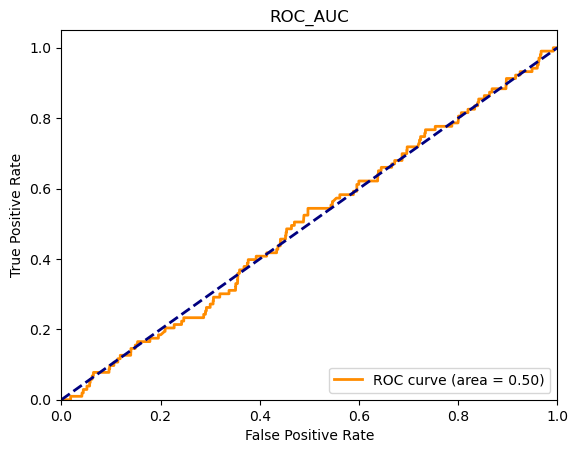

In [75]:
# 计算真正例率（TPR）和假正例率（FPR）
fpr, tpr, thresholds = roc_curve(y_test_3, y_pred_prob_3)

# 计算AUC-ROC的值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="lower right")
plt.show()

## Model 4: 

### Logistic (to replace XGboost of Model 3)

In [76]:
# 划分训练集和测试集
train_X_4, test_X_4, train_y_4, test_y_4 = train_test_split(transformed_features, y_train_3, test_size=0.2, random_state=42)

# 创建Logistic回归模型
logreg = LogisticRegression()

# 训练模型
logreg.fit(train_X_4, train_y_4)

# 预测测试集
y_pred = logreg.predict(test_X_4)

# 计算预测准确率
accuracy = accuracy_score(test_y_4, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9617414248021108


### Test

In [77]:
y_pred_total_4 = logreg.predict(transformed_features_test_3)
y_pred_prob_4 = logreg.predict_proba(transformed_features_test_3)[:, 1]
print(f"Segment - Classification Report:")
print(classification_report(y_pred_total_4, y_test_3))

Segment - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2625
           1       0.10      0.05      0.06       218

    accuracy                           0.89      2843
   macro avg       0.51      0.51      0.50      2843
weighted avg       0.86      0.89      0.88      2843



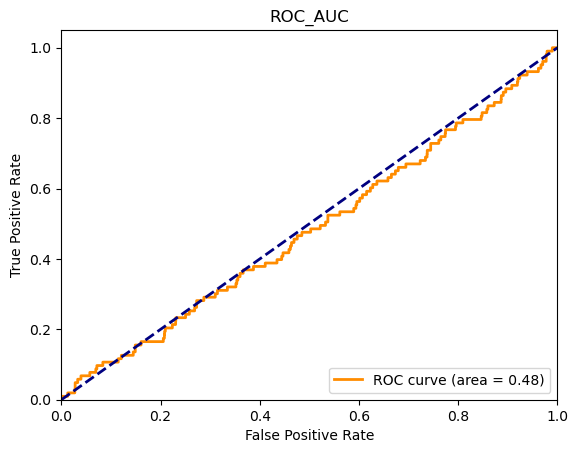

In [78]:
# 计算真正例率（TPR）和假正例率（FPR）
fpr, tpr, thresholds = roc_curve(y_test_3, y_pred_prob_4)

# 计算AUC-ROC的值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="lower right")
plt.show()